In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import dask.dataframe as dd 
import seaborn as sns

In [26]:
FEATURES_TRAINTEST = pd.read_csv('data/FINAL_FEATURES_TRAINTEST.tsv', sep = '\t')
target_df = pd.read_csv('data/FINAL_TARGETS_DATES_TRAINTEST.tsv', sep = '\t')


# FINAL_ALL_SEQUENCES_TRAINTEST

In [2]:
SEQUENCES_TRAINTEST = pd.read_csv('data/FINAL_ALL_SEQUENCES_TRAINTEST.tsv', sep = '\t')

In [244]:
SEQUENCES_TRAINTEST

,CLIENT_ID,SEQUENCE
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be..."
1,1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0..."
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97..."
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409..."
4,100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3..."
...,...,...
123702,999735,"['c734cde7f7ab57d48debbd587f4cf126', 'fdc759e2..."
123703,999783,"['1669b50f343dd2e888c2ef6e2a218b23', '27317357..."
123704,99978,"['5f82488fb41f39bb377b55eb85837dba', '6d69d039..."
123705,999791,"['6a59be6dae2918aa5a0d79ac0cbc39ef', 'dcfd13a9..."


In [123]:
SEQUENCES_TRAINTEST.CLIENT_ID.value_counts()

1000100    1
1597051    1
1597012    1
1597011    1
1597010    1
          ..
1539003    1
1538999    1
1538998    1
1538996    1
999804     1
Name: CLIENT_ID, Length: 123707, dtype: int64

In [13]:
SEQUENCES_TRAINTEST.memory_usage()

Index           128
CLIENT_ID    989656
SEQUENCE     989656
dtype: int64

In [14]:
SEQUENCES_TRAINTEST.CLIENT_ID = SEQUENCES_TRAINTEST.CLIENT_ID.astype(int)

In [15]:
SEQUENCES_TRAINTEST.memory_usage()

Index           128
CLIENT_ID    494828
SEQUENCE     989656
dtype: int64

In [22]:
(SEQUENCES_TRAINTEST.SEQUENCE.str.contains('eb727f972742f7ff6b07ee761ae5da1b'))

0          True
1         False
2          True
3          True
4         False
          ...  
123702    False
123703     True
123704    False
123705    False
123706    False
Name: SEQUENCE, Length: 123707, dtype: bool

In [356]:
SEQUENCES_TRAINTEST['last_state'] = SEQUENCES_TRAINTEST.SEQUENCE.str.strip('[] ').str.split(',').apply(lambda x: x[-1])

In [357]:
SEQUENCES_TRAINTEST

,CLIENT_ID,SEQUENCE,last_state
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be...",'0a0262a3ff2f66dfbc8393f654f04cec'
1,1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0...",'f92a3fab452b79d5e36c2acba0ecb660'
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97...",'c82c51bc925071ff17983d79b472c9f8'
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409...",'e94c27bfcaccb8fa7e2d374026c7bc45'
4,100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3...",'b6486c2402c646e280af20bb4115c4bd'
...,...,...,...
123702,999735,"['c734cde7f7ab57d48debbd587f4cf126', 'fdc759e2...",'3bbcc369f394a4e000b7faf2f41f35ab'
123703,999783,"['1669b50f343dd2e888c2ef6e2a218b23', '27317357...",'9d3087e7e08df9267ad8676fd02b19f7'
123704,99978,"['5f82488fb41f39bb377b55eb85837dba', '6d69d039...",'5f82488fb41f39bb377b55eb85837dba'
123705,999791,"['6a59be6dae2918aa5a0d79ac0cbc39ef', 'dcfd13a9...",'d3ed1c6cad41ca1886e88d8dd2a8cb4e'


In [379]:
freq_seq = SEQUENCES_TRAINTEST.last_state.value_counts()[SEQUENCES_TRAINTEST.last_state.value_counts() > 500].index.values

In [380]:
freq_seq

array([" '5f82488fb41f39bb377b55eb85837dba'",
       " 'b496d19eb25556bd64e481d11b6f7dd6'",
       " '72b88f72bca2636844bb14b9cd9e29b3'",
       " 'ba455a5ff58496c140e8d78f600caf09'",
       " 'e65bd9b13ec4a97ac7b912f37c3e36d4'", '',
       " 'b6486c2402c646e280af20bb4115c4bd'",
       " '828e617555709596bc3b9f248bbab38b'",
       " 'ca431c645b8bbf6de0a2ce1f9856af50'",
       " '358f1de5feb4209fae852fb0a61de5d8'",
       " 'e841b1dc98f3b54f95c0f496cd2769fb'",
       " 'eb727f972742f7ff6b07ee761ae5da1b'",
       " '2d94c9bf487950e65f6f999ced39c116'",
       " '9a7670be67a118ddd4b30f5cdd3b035e'",
       " '5623c50b51bfad7f99c425865e85886c'",
       "'72b88f72bca2636844bb14b9cd9e29b3'",
       " 'cc0db8ffcf04eb974c4cd01b0dcf4b32'",
       " '489fed35d8b91d95691efab0215e46a8'",
       " '360cbb6e297d035c73406c60db192e10'",
       " '6a59be6dae2918aa5a0d79ac0cbc39ef'",
       " '3dfbbc680feefe09131f1e83ef908ec4'",
       "'b496d19eb25556bd64e481d11b6f7dd6'",
       " '1669b50f343dd2e888c2ef

In [381]:
seq_target = SEQUENCES_TRAINTEST.merge(TARGETS_DATES_TRAINTEST)
seq_target = seq_target[seq_target.TARGET != 'test']

In [382]:
seq_target

,CLIENT_ID,SEQUENCE,last_state,RETRO_DT,TARGET
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be...",'0a0262a3ff2f66dfbc8393f654f04cec',20210512,0
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97...",'c82c51bc925071ff17983d79b472c9f8',20210613,0
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409...",'e94c27bfcaccb8fa7e2d374026c7bc45',20210601,1
5,1000225,"['b8f6a6a0766163b13ee6b74febd534c9', '1669b50f...",'fa5c254595c082a5ba3ff37de1c22647',20210530,1
6,1000357,"['d4882c24fc33e6c29c80477aef43284e', 'af80e9d1...",'2d94c9bf487950e65f6f999ced39c116',20210520,0
...,...,...,...,...,...
123702,999735,"['c734cde7f7ab57d48debbd587f4cf126', 'fdc759e2...",'3bbcc369f394a4e000b7faf2f41f35ab',20210611,0
123703,999783,"['1669b50f343dd2e888c2ef6e2a218b23', '27317357...",'9d3087e7e08df9267ad8676fd02b19f7',20210528,1
123704,99978,"['5f82488fb41f39bb377b55eb85837dba', '6d69d039...",'5f82488fb41f39bb377b55eb85837dba',20210504,0
123705,999791,"['6a59be6dae2918aa5a0d79ac0cbc39ef', 'dcfd13a9...",'d3ed1c6cad41ca1886e88d8dd2a8cb4e',20210628,1


In [383]:
seq_target[seq_target.last_state.isin(freq_seq)].TARGET.values

array(['0', '1', '0', ..., '0', '1', '0'], dtype=object)

In [384]:
seq_target.last_state.value_counts()

 '5f82488fb41f39bb377b55eb85837dba'    13325
 'b496d19eb25556bd64e481d11b6f7dd6'     6790
 '72b88f72bca2636844bb14b9cd9e29b3'     3555
 'ba455a5ff58496c140e8d78f600caf09'     3188
 'e65bd9b13ec4a97ac7b912f37c3e36d4'     2520
                                       ...  
 '21d932b58c2534d953090ff9bfd66b08'        1
 '2227e114f037626c218e5703cd1d3ed4'        1
 '68344a06d236a2516f27c4cd1c6e90f8'        1
 'd519a2c02528fa20cfa978f006ce7328'        1
 '36ec12103e48691e67a2dcef2db88842'        1
Name: last_state, Length: 9925, dtype: int64

In [385]:
seq_target

,CLIENT_ID,SEQUENCE,last_state,RETRO_DT,TARGET
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be...",'0a0262a3ff2f66dfbc8393f654f04cec',20210512,0
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97...",'c82c51bc925071ff17983d79b472c9f8',20210613,0
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409...",'e94c27bfcaccb8fa7e2d374026c7bc45',20210601,1
5,1000225,"['b8f6a6a0766163b13ee6b74febd534c9', '1669b50f...",'fa5c254595c082a5ba3ff37de1c22647',20210530,1
6,1000357,"['d4882c24fc33e6c29c80477aef43284e', 'af80e9d1...",'2d94c9bf487950e65f6f999ced39c116',20210520,0
...,...,...,...,...,...
123702,999735,"['c734cde7f7ab57d48debbd587f4cf126', 'fdc759e2...",'3bbcc369f394a4e000b7faf2f41f35ab',20210611,0
123703,999783,"['1669b50f343dd2e888c2ef6e2a218b23', '27317357...",'9d3087e7e08df9267ad8676fd02b19f7',20210528,1
123704,99978,"['5f82488fb41f39bb377b55eb85837dba', '6d69d039...",'5f82488fb41f39bb377b55eb85837dba',20210504,0
123705,999791,"['6a59be6dae2918aa5a0d79ac0cbc39ef', 'dcfd13a9...",'d3ed1c6cad41ca1886e88d8dd2a8cb4e',20210628,1


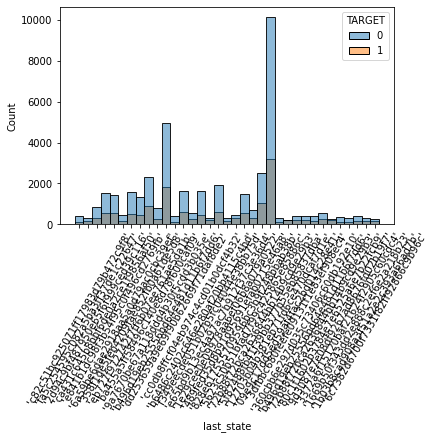

In [386]:
sns.histplot(data=seq_target[seq_target.last_state.isin(freq_seq)],
             x='last_state',
             hue='TARGET',
            );
plt.xticks(rotation=60);
plt.show()

# FINAL_SEQUENCES_MATRIX

In [240]:
SEQUENCES_MATRIX = pd.read_csv('data/FINAL_SEQUENCES_MATRIX.tsv', sep = '\t')


In [241]:
SEQUENCES_MATRIX.head(30)

,SESSIONS_SEQUENCES
0,"['68a9902529901882ecd5143460468d4c', '79d75347..."
1,['72b88f72bca2636844bb14b9cd9e29b3']
2,"['b496d19eb25556bd64e481d11b6f7dd6', 'd21918bb..."
3,"['dcb3d50673073d3c023db102f21b2d3e', '09a5d816..."
4,"['3de59e26ee7e94a6ccd0a2eead2fab9a', '4a51f13a..."
5,"['d71a939fbfcf75a5044369d437108a27', 'dd43b65e..."
6,"['e70caa4519fd15e96831b80abe204524', 'b71bc9c9..."
7,['8e64955dc5b9de99719d2388012226e8']
8,"['94ae8b79e87cf70605f7f8f022dfa25a', '9ee4b669..."
9,"['e65bd9b13ec4a97ac7b912f37c3e36d4', 'f063190a..."


# Client Features

In [2]:
FEATURES_TRAINTEST = pd.read_csv('data/FINAL_FEATURES_TRAINTEST.tsv', sep = '\t')

In [131]:
FEATURES_TRAINTEST.describe()

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
count,1.592880e+05,159288.000000,159288.000000,159288.000000,159288.000000,159288.000000,159288.000000,159288.000000,159288.000000,159288.000000,...,159288.000000,159288.000000,159288.000000,159288.0,159288.000000,159288.000000,159288.000000,159288.0,159288.000000,159288.000000
mean,1.285833e+06,0.021967,7.522751,53.174815,1.072755,1.757471,8.788999,18.178827,0.000295,0.101257,...,1.789457,5.719282,4.183962,0.0,4.024484,50.476138,0.000402,0.0,0.000364,0.043023
std,5.402899e+05,0.986038,44.714933,252.483215,12.974719,12.685386,82.682505,149.351975,0.027331,4.153940,...,124.430558,386.821002,230.910573,0.0,267.411800,1357.111231,0.114217,0.0,0.089852,9.008135
min,7.150000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.342659e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.534406e+06,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.577165e+06,0.000000,3.000000,32.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.770292e+06,252.000000,10863.000000,30819.000000,2540.000000,1405.000000,20009.000000,27746.000000,6.000000,942.000000,...,28290.000000,81381.000000,48930.000000,0.0,81003.000000,165815.000000,44.000000,0.0,26.000000,3194.000000


In [146]:
FEATURES_TRAINTEST.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159288 entries, 0 to 159287
Columns: 1015 entries, CLIENT_ID to u8=9
dtypes: float64(1014), int64(1)
memory usage: 1.2 GB


In [164]:
FEATURES_TRAINTEST.astype(np.int32).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159288 entries, 0 to 159287
Columns: 1015 entries, CLIENT_ID to u8=9
dtypes: int32(1015)
memory usage: 616.8 MB


See if some cols can be converted to int

In [201]:
can_be_conv_list  = []
for col_name in FEATURES_TRAINTEST.columns:
    flag_can_be_conv = np.array_equal(FEATURES_TRAINTEST[col_name], FEATURES_TRAINTEST[col_name].astype(np.int32)) 
    can_be_conv_list.append(flag_can_be_conv)
    print('Column {} can be converted to int = {}'.format(col_name, flag_can_be_conv
                                                         ))

Column CLIENT_ID can be converted to int = True
Column i1047 can be converted to int = True
Column i1048 can be converted to int = True
Column i1056 can be converted to int = True
Column i1058 can be converted to int = True
Column i1059 can be converted to int = True
Column i1060 can be converted to int = True
Column i1065 can be converted to int = True
Column i1066 can be converted to int = True
Column i1067 can be converted to int = True
Column i1068 can be converted to int = True
Column i1070 can be converted to int = True
Column i1073 can be converted to int = True
Column i1074 can be converted to int = True
Column i1075 can be converted to int = True
Column i1077 can be converted to int = True
Column i1079 can be converted to int = True
Column i1092 can be converted to int = True
Column i1095 can be converted to int = True
Column i1097 can be converted to int = True
Column i1130 can be converted to int = True
Column i1139 can be converted to int = True
Column i1147 can be converte

Column i3276 can be converted to int = True
Column i3278 can be converted to int = True
Column i3282 can be converted to int = True
Column i3284 can be converted to int = True
Column i3286 can be converted to int = True
Column i3288 can be converted to int = True
Column i3290 can be converted to int = True
Column i3292 can be converted to int = True
Column i3294 can be converted to int = True
Column i3296 can be converted to int = True
Column i3298 can be converted to int = True
Column i3300 can be converted to int = True
Column i3302 can be converted to int = True
Column i3304 can be converted to int = True
Column i3318 can be converted to int = True
Column i3320 can be converted to int = True
Column i3324 can be converted to int = True
Column i3348 can be converted to int = True
Column i3350 can be converted to int = True
Column i3356 can be converted to int = True
Column i3358 can be converted to int = True
Column i3360 can be converted to int = True
Column i3382 can be converted to

Column i825 can be converted to int = True
Column i827 can be converted to int = True
Column i829 can be converted to int = True
Column i830 can be converted to int = True
Column i831 can be converted to int = True
Column i832 can be converted to int = True
Column i833 can be converted to int = True
Column i834 can be converted to int = True
Column i836 can be converted to int = True
Column i838 can be converted to int = True
Column i839 can be converted to int = True
Column i845 can be converted to int = True
Column i846 can be converted to int = True
Column i859 can be converted to int = True
Column i860 can be converted to int = True
Column i873 can be converted to int = True
Column i876 can be converted to int = True
Column i883 can be converted to int = True
Column i890 can be converted to int = True
Column i891 can be converted to int = True
Column i892 can be converted to int = True
Column i924 can be converted to int = True
Column i937 can be converted to int = True
Column u0=0

Column u1=322 can be converted to int = True
Column u1=324 can be converted to int = True
Column u1=325 can be converted to int = True
Column u1=326 can be converted to int = True
Column u1=330 can be converted to int = True
Column u1=331 can be converted to int = True
Column u1=360 can be converted to int = True
Column u1=362 can be converted to int = True
Column u1=370 can be converted to int = True
Column u1=371 can be converted to int = True
Column u1=372 can be converted to int = True
Column u1=373 can be converted to int = True
Column u1=374 can be converted to int = True
Column u1=45 can be converted to int = True
Column u1=46 can be converted to int = True
Column u1=47 can be converted to int = True
Column u1=55 can be converted to int = True
Column u1=56 can be converted to int = True
Column u1=57 can be converted to int = True
Column u1=59 can be converted to int = True
Column u1=60 can be converted to int = True
Column u1=73 can be converted to int = True
Column u1=74 can be

Column u7=1 can be converted to int = True
Column u7=1.00 can be converted to int = True
Column u7=1.01 can be converted to int = True
Column u7=1.02 can be converted to int = True
Column u7=1.03 can be converted to int = True
Column u7=1.04 can be converted to int = True
Column u7=1.05 can be converted to int = True
Column u7=1.06 can be converted to int = True
Column u7=1.07 can be converted to int = True
Column u7=1.08 can be converted to int = True
Column u7=1.09 can be converted to int = True
Column u7=1.1 can be converted to int = True
Column u7=1.10 can be converted to int = True
Column u7=1.11 can be converted to int = True
Column u7=1.12 can be converted to int = True
Column u7=1.13 can be converted to int = True
Column u7=1.14 can be converted to int = True
Column u7=1.15 can be converted to int = True
Column u7=1.16 can be converted to int = True
Column u7=1.17 can be converted to int = True
Column u7=1.18 can be converted to int = True
Column u7=1.2 can be converted to int 

In [202]:
np.unique(can_be_conv_list)

array([ True])

> Thus all of the columns can be converted to int dtype

In [17]:
FEATURES_TRAINTEST.columns[(FEATURES_TRAINTEST.std() == 0)]

Index(['u0=156', 'u0=218', 'u0=220', 'u1=94', 'u5=8', 'u8=2', 'u8=7'], dtype='object')

In [11]:
list(FEATURES_TRAINTEST.columns.values)

['CLIENT_ID',
 'i1047',
 'i1048',
 'i1056',
 'i1058',
 'i1059',
 'i1060',
 'i1065',
 'i1066',
 'i1067',
 'i1068',
 'i1070',
 'i1073',
 'i1074',
 'i1075',
 'i1077',
 'i1079',
 'i1092',
 'i1095',
 'i1097',
 'i1130',
 'i1139',
 'i1147',
 'i1169',
 'i1193',
 'i1205',
 'i1214',
 'i1225',
 'i1228',
 'i1246',
 'i1248',
 'i1256',
 'i1262',
 'i1270',
 'i1280',
 'i1287',
 'i1297',
 'i1299',
 'i1328',
 'i1332',
 'i1339',
 'i1342',
 'i1343',
 'i1344',
 'i1345',
 'i1346',
 'i1347',
 'i1352',
 'i1353',
 'i1355',
 'i1357',
 'i1360',
 'i1361',
 'i1363',
 'i1364',
 'i1375',
 'i1386',
 'i1387',
 'i1392',
 'i1393',
 'i1411',
 'i1427',
 'i1431',
 'i1438',
 'i1442',
 'i1447',
 'i1449',
 'i1457',
 'i1460',
 'i1462',
 'i1463',
 'i1465',
 'i1466',
 'i1474',
 'i1476',
 'i1477',
 'i1480',
 'i1481',
 'i1485',
 'i1494',
 'i1496',
 'i1502',
 'i1503',
 'i1504',
 'i1505',
 'i1506',
 'i1507',
 'i1508',
 'i1509',
 'i1510',
 'i1511',
 'i1512',
 'i1513',
 'i1514',
 'i1515',
 'i1516',
 'i1517',
 'i1518',
 'i1519',
 'i152

In [231]:
feat_with_target = FEATURES_TRAINTEST.merge(TARGETS_DATES_TRAINTEST)
feat_with_target = feat_with_target[feat_with_target.TARGET != 'test']
feat_with_target.TARGET = feat_with_target.TARGET.astype(np.int16)

In [233]:
feat_client_corr = feat_with_target.corr()

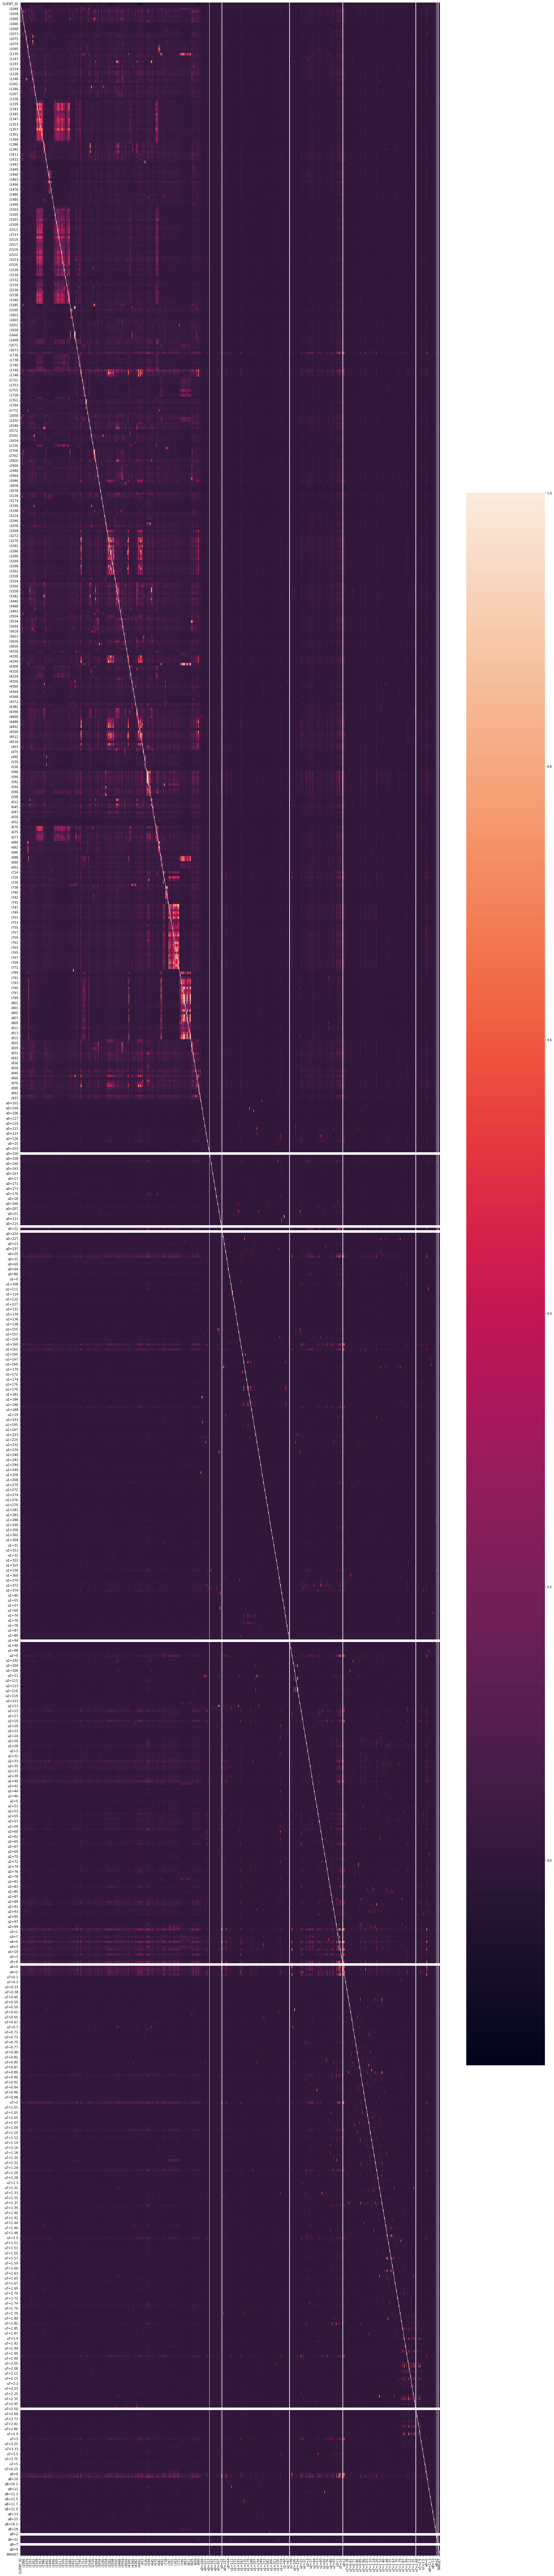

In [238]:
plt.figure(figsize=(30,150))
sns.heatmap(feat_client_corr);
plt.show()

In [124]:
FEATURES_TRAINTEST.CLIENT_ID.value_counts()

7150       1
1556897    1
1556890    1
1556891    1
1556892    1
          ..
1534507    1
1534508    1
1534509    1
1534510    1
1770292    1
Name: CLIENT_ID, Length: 159288, dtype: int64

In [62]:
sum(FEATURES_TRAINTEST.CLIENT_ID == 99981973)

0

In [54]:
FEATURES_TRAINTEST[FEATURES_TRAINTEST.CLIENT_ID == 99981973]

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9


In [38]:
FEATURES_TRAINTEST[FEATURES_TRAINTEST.CLIENT_ID.isin([84024, 86181])]

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9


# Friends

##  Reading first nrows

In [107]:
FEATURES_FRIENDS = pd.read_csv('data/FINAL_FEATURES_FRIENDS.tsv', sep = '\t', nrows=1000000)

In [108]:
FEATURES_FRIENDS

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
0,999819,0.0,0.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981973
1,999819,0.0,45.0,41.0,0.0,18.0,2.0,17.0,0.0,6.0,...,0.0,29.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,99981949
2,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981979
3,999819,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981939
4,999819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99981975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83231,0.0,3.0,240.0,2.0,5.0,9.0,210.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8323156
99996,83231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8323162
99997,83231,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8323113
99998,83231,0.0,0.0,24.0,0.0,0.0,4.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8323100


(array([ 84.,  53.,  57.,  59.,  54.,  45.,  48.,  52.,  59., 784.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

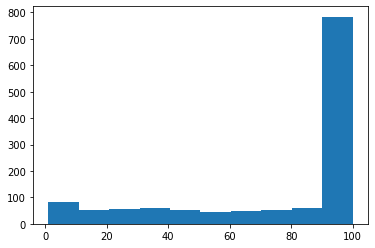

In [111]:
plt.hist(FEATURES_FRIENDS.groupby(['CLIENT_ID'])['FRIEND_ID'].count())

In [47]:
FEATURES_FRIENDS.describe()

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000,1.000000e+04
mean,868885.589600,0.023100,10.197900,72.424500,2.101100,2.853600,15.164100,22.666200,0.000800,0.075200,...,4.471800,13.773600,0.0,7.058400,67.775000,0.0,0.0,0.0,0.119300,8.688860e+07
std,291954.961885,0.538698,39.965571,249.155008,30.127307,22.552796,88.657046,116.951237,0.048986,1.401764,...,120.797326,852.193508,0.0,205.384236,1146.775637,0.0,0.0,0.0,8.836101,2.919550e+07
min,95650.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.565000e+06
25%,960879.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.608791e+07
50%,977883.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.778837e+07
75%,988951.000000,0.000000,4.000000,46.000000,0.000000,0.000000,3.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,9.889513e+07
max,999819.000000,34.000000,1306.000000,7650.000000,2561.000000,1131.000000,4094.000000,5310.000000,4.000000,76.000000,...,8418.000000,80065.000000,0.0,9588.000000,48101.000000,0.0,0.0,0.0,822.000000,9.998198e+07


Features of a ceartain client 

In [88]:
FEATURES_FRIENDS.CLIENT_ID.unique()

array([999819,  99978, 999555, 999478,  99881, 998604, 998421, 998390,
       997570, 997177, 997150, 997106, 996300,  99607, 995707, 995549,
       995191,  99516, 994883,  99477, 994682,  99413, 994079, 993533,
       993155, 993138, 993123, 992975, 992061, 990720, 990379, 990108,
        98982, 989716, 989110, 988951, 988712, 988262, 988195, 987554,
       987413, 987047,  98677, 986053, 986011, 985939, 985543, 985191,
       985090,  98472, 983666, 983114, 982512, 982427, 982119, 982101,
       982046, 981938, 981751, 981611, 981421, 981263, 981189, 980977,
       979974,  97974, 979582, 979393,  97879, 978104, 977883, 977441,
       977405, 976368, 976338, 975766, 974987, 974650, 974267, 973049,
       972967, 972275, 972035, 972011, 971669, 971501, 971223, 969449,
       969164, 968052, 967551, 967544,  96752, 967424, 967121, 966519,
       966278, 965009, 964825, 964577, 964273,  96424, 964237,  96395,
       963749, 962881, 960935, 960879, 960522, 960503, 960440, 960082,
      

In [102]:
one_client = FEATURES_TRAINTEST[FEATURES_TRAINTEST.CLIENT_ID==999819].iloc[:,1:].values
friends_featrues_of_one_client = FEATURES_FRIENDS[FEATURES_FRIENDS.CLIENT_ID == 999819].iloc[:,1:-1].values

In [103]:
from sklearn.metrics.pairwise import cosine_similarity

cossims = cosine_similarity(one_client, friends_featrues_of_one_client)

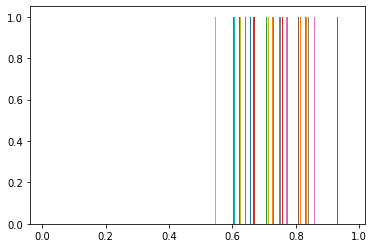

In [106]:
import matplotlib.pyplot as plt
plt.hist(cossims);


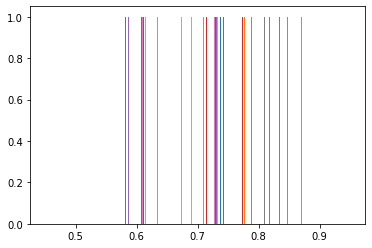

In [101]:
import matplotlib.pyplot as plt
plt.hist(cossims);


In [126]:
FEATURES_FRIENDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 1016 entries, CLIENT_ID to FRIEND_ID
dtypes: float64(1014), int64(2)
memory usage: 775.1 MB


In [129]:
FEATURES_FRIENDS.astype(int)

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
0,999819,0,0,8,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,99981973
1,999819,0,45,41,0,18,2,17,0,6,...,0,29,0,0,133,0,0,0,0,99981949
2,999819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99981979
3,999819,0,0,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,99981939
4,999819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99981975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83231,0,3,240,2,5,9,210,0,0,...,0,0,0,0,0,0,0,0,0,8323156
99996,83231,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8323162
99997,83231,0,0,4,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,8323113
99998,83231,0,0,24,0,0,4,13,0,0,...,0,0,0,0,0,0,0,0,0,8323100


## Reading Friends_df as int32 - still weights a lot - READING IN CHUNKS

In [208]:
FEATURES_FRIENDS = pd.read_csv('data/FINAL_FEATURES_FRIENDS.tsv', 
                               sep = '\t', 
                               dtype=np.int32, 
                               chunksize=100_000)

In [210]:
next(FEATURES_FRIENDS)

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9,FRIEND_ID
0,999819,0,0,8,1,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,99981973
1,999819,0,45,41,0,18,2,17,0,6,...,0,29,0,0,133,0,0,0,0,99981949
2,999819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99981979
3,999819,0,0,2,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,99981939
4,999819,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,99981975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,83231,0,3,240,2,5,9,210,0,0,...,0,0,0,0,0,0,0,0,0,8323156
99996,83231,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8323162
99997,83231,0,0,4,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,8323113
99998,83231,0,0,24,0,0,4,13,0,0,...,0,0,0,0,0,0,0,0,0,8323100


Memory usage was 3.8 Gb with np.int32 and nrows=1_000_000

In [205]:
FEATURES_FRIENDS.astype(np.int32).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 1016 entries, CLIENT_ID to FRIEND_ID
dtypes: int32(1016)
memory usage: 3.8 GB


In [203]:
can_be_conv_list  = []
for col_name in FEATURES_TRAINTEST.columns:
    flag_can_be_conv = np.array_equal(FEATURES_FRIENDS[col_name], FEATURES_FRIENDS[col_name].astype(np.int32)) 
    can_be_conv_list.append(flag_can_be_conv)
    print('Column {} can be converted to int = {}'.format(col_name, flag_can_be_conv
                                                         ))

Column CLIENT_ID can be converted to int = True
Column i1047 can be converted to int = True
Column i1048 can be converted to int = True
Column i1056 can be converted to int = True
Column i1058 can be converted to int = True
Column i1059 can be converted to int = True
Column i1060 can be converted to int = True
Column i1065 can be converted to int = True
Column i1066 can be converted to int = True
Column i1067 can be converted to int = True
Column i1068 can be converted to int = True
Column i1070 can be converted to int = True
Column i1073 can be converted to int = True
Column i1074 can be converted to int = True
Column i1075 can be converted to int = True
Column i1077 can be converted to int = True
Column i1079 can be converted to int = True
Column i1092 can be converted to int = True
Column i1095 can be converted to int = True
Column i1097 can be converted to int = True
Column i1130 can be converted to int = True
Column i1139 can be converted to int = True
Column i1147 can be converte

Column i3048 can be converted to int = True
Column i3058 can be converted to int = True
Column i3068 can be converted to int = True
Column i3078 can be converted to int = True
Column i3086 can be converted to int = True
Column i3134 can be converted to int = True
Column i3172 can be converted to int = True
Column i3174 can be converted to int = True
Column i3182 can be converted to int = True
Column i3190 can be converted to int = True
Column i3192 can be converted to int = True
Column i3198 can be converted to int = True
Column i3222 can be converted to int = True
Column i3224 can be converted to int = True
Column i3226 can be converted to int = True
Column i3246 can be converted to int = True
Column i3248 can be converted to int = True
Column i3258 can be converted to int = True
Column i3262 can be converted to int = True
Column i3268 can be converted to int = True
Column i3270 can be converted to int = True
Column i3272 can be converted to int = True
Column i3274 can be converted to

Column i792 can be converted to int = True
Column i793 can be converted to int = True
Column i794 can be converted to int = True
Column i795 can be converted to int = True
Column i796 can be converted to int = True
Column i797 can be converted to int = True
Column i798 can be converted to int = True
Column i799 can be converted to int = True
Column i800 can be converted to int = True
Column i801 can be converted to int = True
Column i802 can be converted to int = True
Column i803 can be converted to int = True
Column i804 can be converted to int = True
Column i805 can be converted to int = True
Column i806 can be converted to int = True
Column i807 can be converted to int = True
Column i808 can be converted to int = True
Column i809 can be converted to int = True
Column i810 can be converted to int = True
Column i811 can be converted to int = True
Column i812 can be converted to int = True
Column i813 can be converted to int = True
Column i814 can be converted to int = True
Column i815

Column u1=233 can be converted to int = True
Column u1=234 can be converted to int = True
Column u1=235 can be converted to int = True
Column u1=240 can be converted to int = True
Column u1=241 can be converted to int = True
Column u1=242 can be converted to int = True
Column u1=243 can be converted to int = True
Column u1=244 can be converted to int = True
Column u1=245 can be converted to int = True
Column u1=249 can be converted to int = True
Column u1=251 can be converted to int = True
Column u1=258 can be converted to int = True
Column u1=260 can be converted to int = True
Column u1=268 can be converted to int = True
Column u1=27 can be converted to int = True
Column u1=270 can be converted to int = True
Column u1=271 can be converted to int = True
Column u1=272 can be converted to int = True
Column u1=273 can be converted to int = True
Column u1=274 can be converted to int = True
Column u1=275 can be converted to int = True
Column u1=276 can be converted to int = True
Column u1=2

Column u2=97 can be converted to int = True
Column u2=98 can be converted to int = True
Column u2=99 can be converted to int = True
Column u3=0 can be converted to int = True
Column u3=1 can be converted to int = True
Column u3=6 can be converted to int = True
Column u3=7 can be converted to int = True
Column u3=8 can be converted to int = True
Column u4=0 can be converted to int = True
Column u4=2 can be converted to int = True
Column u4=3 can be converted to int = True
Column u5=0 can be converted to int = True
Column u5=10 can be converted to int = True
Column u5=2 can be converted to int = True
Column u5=3 can be converted to int = True
Column u5=4 can be converted to int = True
Column u5=6 can be converted to int = True
Column u5=8 can be converted to int = True
Column u6=0 can be converted to int = True
Column u6=1 can be converted to int = True
Column u6=2 can be converted to int = True
Column u7=0 can be converted to int = True
Column u7=0.1 can be converted to int = True
Colum

Column u7=2.19 can be converted to int = True
Column u7=2.2 can be converted to int = True
Column u7=2.22 can be converted to int = True
Column u7=2.23 can be converted to int = True
Column u7=2.24 can be converted to int = True
Column u7=2.25 can be converted to int = True
Column u7=2.3 can be converted to int = True
Column u7=2.35 can be converted to int = True
Column u7=2.4 can be converted to int = True
Column u7=2.45 can be converted to int = True
Column u7=2.5 can be converted to int = True
Column u7=2.50 can be converted to int = True
Column u7=2.6 can be converted to int = True
Column u7=2.68 can be converted to int = True
Column u7=2.7 can be converted to int = True
Column u7=2.73 can be converted to int = True
Column u7=2.8 can be converted to int = True
Column u7=2.81 can be converted to int = True
Column u7=2.85 can be converted to int = True
Column u7=2.86 can be converted to int = True
Column u7=2.88 can be converted to int = True
Column u7=2.9 can be converted to int = T

In [204]:
np.unique(can_be_conv_list)

array([ True])

In [206]:
# FEATURES_FRIENDS.astype(np.int32).to_csv("patches/friends_0-1e+6.tsv", sep='\t' )

In [193]:
FEATURES_FRIENDS.memory_usage()

Index            128
CLIENT_ID    8000000
i1047        8000000
i1048        8000000
i1056        8000000
              ...   
u8=6         8000000
u8=7         8000000
u8=8         8000000
u8=9         8000000
FRIEND_ID    8000000
Length: 1017, dtype: int64

In [211]:
import gc
gc.collect()

31536

# FINAL_TARGETS_DATES_TRAINTEST

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
import lightgbm as lgb

from xgboost import XGBClassifier

from catboost import CatBoostClassifier


metric = roc_auc_score

In [28]:
target_df.TARGET.value_counts()

0       92491
1       34941
test    31858
Name: TARGET, dtype: int64

In [29]:
target_df = pd.read_csv('data/FINAL_TARGETS_DATES_TRAINTEST.tsv', sep = '\t')
target_df = target_df[~target_df.CLIENT_ID.isin([84024, 86181])]

In [30]:
# client_id_trainval = target_df[target_df.TARGET != 'test'].CLIENT_ID.values

# client_id_train, client_id_val = train_test_split(
#     client_id_trainval, 
#     test_size=0.2, 
#     random_state=9195, 
#     stratify=target_df[target_df.TARGET != 'test'].TARGET.values)

# client_id_train = np.fromfile('data/split_train_I', dtype=np.int32, sep=',')
# client_id_val = np.fromfile('data/split_val_I', dtype=np.int32, sep=',')

In [31]:
client_id_train = target_df[target_df.TARGET != 'test'].CLIENT_ID.values
client_id_val = []

In [32]:
df_train_self = FEATURES_TRAINTEST[FEATURES_TRAINTEST.CLIENT_ID.isin(client_id_train)].sort_values('CLIENT_ID')
df_val_self = FEATURES_TRAINTEST[FEATURES_TRAINTEST.CLIENT_ID.isin(client_id_val)].sort_values('CLIENT_ID')

y_train = target_df[target_df.CLIENT_ID.isin(client_id_train)].sort_values('CLIENT_ID')
y_val = target_df[target_df.CLIENT_ID.isin(client_id_val)].sort_values('CLIENT_ID')

In [9]:
cat_useful_features = np.array(['i4500', 'i1748', 'i4292', 'i831', 'i1667', 'i715', 'u1=187',
       'u2=76', 'u2=75', 'u2=19', 'i883', 'i4488', 'i1411', 'i890',
       'u7=1.5', 'i588', 'i1457', 'i3534', 'u1=160', 'i1681', 'i1460',
       'i1598', 'u2=15', 'u2=66', 'i1092', 'u2=54', 'i720', 'i3350',
       'u0=22', 'i714', 'i1465', 'i859', 'i1746', 'u7=1', 'u0=124',
       'u1=108', 'i768', 'i3358', 'i688', 'i1462', 'i1147', 'u8=0.1',
       'u4=3', 'u0=26', 'i591', 'i3268', 'i876', 'i1466', 'u2=4', 'u7=2',
       'u2=83', 'i717', 'i3284', 'i860', 'i1431', 'i1361', 'u2=14',
       'i1130', 'u1=374', 'i465', 'i676', 'i490', 'u5=2', 'u2=6', 'i491',
       'u6=2', 'i1070', 'i574', 'u0=127', 'i520', 'i4492', 'i647', 'i597',
       'i453', 'i4294', 'u5=6', 'i825', 'i606', 'u0=23', 'u2=40', 'i1360',
       'i845', 'u7=1.33', 'u2=31', 'i726', 'i670', 'i1669', 'i593',
       'i2510', 'i821', 'u2=0', 'i1438', 'i4296', 'i650', 'u2=36',
       'u2=38', 'u3=7', 'u7=2.25', 'u7=3', 'i2626'])

### Model on client features only 

In [8]:
X_train = df_train_self.drop('CLIENT_ID', axis=1).astype(np.int32)
X_val = df_val_self.drop('CLIENT_ID', axis=1).astype(np.int32)

y_train = y_train.TARGET.values.astype(np.int32)
y_val = y_val.TARGET.values.astype(np.int32)

In [9]:
zero_std_features = X_train.std()[X_train.std() == 0].index.values

X_train = X_train.drop(zero_std_features, axis=1)
X_val = X_val.drop(zero_std_features, axis=1)

In [27]:
models = {
    'logreg' : LogisticRegression(n_jobs=-1, max_iter=10, verbose=1001),
    'lgb':LGBMClassifier(
    #     boosting_type='gbdt',
        n_estimators=1000,
    # #     num_leaves = 50,
        learning_rate = 0.03,
    #     max_depth = 100,
    #     num_leaves = 20,
    # #     subsample = 0.9,
    # #     class_weight= 'balanced',
        n_jobs=-1,
        silent=False,
        random_state=42,
    ),
   "xgb": XGBClassifier(
       tree_method='gpu_hist', 
       verbosity=1, 
       n_estimators = 1000,
       learning_rate = 0.01,
       max_depth = 10,
   ),
    "cat": CatBoostClassifier(
        iterations=3000,
        learning_rate=0.01,
        silent=False,
        random_seed=42,
        task_type='GPU',
        eval_metric = 'AUC',
#         max_ctr_complexity = 2,
        max_depth=10,
#         metric_period=50,
    )
}

clf = models['cat']
scores = {}
probas = {}

# cat_useful_features = ['i4500', 'i1748', 'i4292', 'i831', 'i1667', 'i715', 'u1=187',
#        'u2=76', 'u2=75', 'u2=19', 'i883', 'i4488', 'i1411', 'i890',
#        'u7=1.5', 'i588', 'i1457', 'i3534', 'u1=160', 'i1681', 'i1460',
#        'i1598', 'u2=15', 'u2=66', 'i1092', 'u2=54', 'i720', 'i3350',
#        'u0=22', 'i714', 'i1465', 'i859', 'i1746', 'u7=1', 'u0=124',
#        'u1=108', 'i768', 'i3358', 'i688', 'i1462', 'i1147', 'u8=0.1',
#        'u4=3', 'u0=26', 'i591', 'i3268', 'i876', 'i1466', 'u2=4', 'u7=2',
#        'u2=83', 'i717', 'i3284', 'i860', 'i1431', 'i1361', 'u2=14',
#        'i1130', 'u1=374', 'i465', 'i676', 'i490', 'u5=2', 'u2=6', 'i491',
#        'u6=2', 'i1070', 'i574', 'u0=127', 'i520', 'i4492', 'i647', 'i597',
#        'i453', 'i4294', 'u5=6', 'i825', 'i606', 'u0=23', 'u2=40', 'i1360',
#        'i845', 'u7=1.33', 'u2=31', 'i726', 'i670', 'i1669', 'i593',
#        'i2510', 'i821', 'u2=0', 'i1438', 'i4296', 'i650', 'u2=36',
#        'u2=38', 'u3=7', 'u7=2.25', 'u7=3', 'i2626']


clf.fit(
#     X_train,
    X_train.loc[:, cat_useful_features],
    y_train,
    eval_set=[(
#         X_val, 
        X_val.loc[:, cat_useful_features], 
        y_val)],
#     eval_metric=['auc'],
    early_stopping_rounds=300,
    plot=True
    
)

probas['train'] = clf.predict_proba(X_train.iloc[:, :])[:, 1]
probas['val'] = clf.predict_proba(X_val.iloc[:, :])[:, 1]
scores['train'] = metric(y_train, probas['train'])
scores['val'] = metric(y_val, probas['val'])

print(scores)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.5505383	best: 0.5505383 (0)	total: 79.5ms	remaining: 3m 58s
1:	total: 153ms	remaining: 3m 49s
2:	total: 217ms	remaining: 3m 36s
3:	total: 278ms	remaining: 3m 28s
4:	total: 335ms	remaining: 3m 20s
5:	test: 0.5751742	best: 0.5751742 (5)	total: 398ms	remaining: 3m 18s
6:	total: 460ms	remaining: 3m 16s
7:	total: 519ms	remaining: 3m 14s
8:	total: 582ms	remaining: 3m 13s
9:	total: 644ms	remaining: 3m 12s
10:	test: 0.5805669	best: 0.5805669 (10)	total: 707ms	remaining: 3m 12s
11:	total: 769ms	remaining: 3m 11s
12:	total: 828ms	remaining: 3m 10s
13:	total: 889ms	remaining: 3m 9s
14:	total: 948ms	remaining: 3m 8s
15:	test: 0.5829246	best: 0.5829246 (15)	total: 1s	remaining: 3m 7s
16:	total: 1.06s	remaining: 3m 6s
17:	total: 1.12s	remaining: 3m 5s
18:	total: 1.19s	remaining: 3m 5s
19:	total: 1.24s	remaining: 3m 5s
20:	test: 0.5839863	best: 0.5839863 (20)	total: 1.3s	remaining: 3m 5s
21:	total: 1.37s	remaining: 3m 5s
22:	total: 1.43s	remaining: 3m 4s
23:	total: 1.49s	remaining: 3m 4s
2

195:	test: 0.5943533	best: 0.5943533 (195)	total: 11.7s	remaining: 2m 47s
196:	total: 11.7s	remaining: 2m 47s
197:	total: 11.8s	remaining: 2m 47s
198:	total: 11.9s	remaining: 2m 47s
199:	total: 11.9s	remaining: 2m 46s
200:	test: 0.5944270	best: 0.5944687 (197)	total: 12s	remaining: 2m 46s
201:	total: 12s	remaining: 2m 46s
202:	total: 12.1s	remaining: 2m 46s
203:	total: 12.2s	remaining: 2m 46s
204:	total: 12.2s	remaining: 2m 46s
205:	test: 0.5944900	best: 0.5945049 (203)	total: 12.3s	remaining: 2m 46s
206:	total: 12.3s	remaining: 2m 46s
207:	total: 12.4s	remaining: 2m 46s
208:	total: 12.4s	remaining: 2m 46s
209:	total: 12.5s	remaining: 2m 46s
210:	test: 0.5944499	best: 0.5945393 (206)	total: 12.6s	remaining: 2m 45s
211:	total: 12.6s	remaining: 2m 45s
212:	total: 12.7s	remaining: 2m 45s
213:	total: 12.7s	remaining: 2m 45s
214:	total: 12.8s	remaining: 2m 45s
215:	test: 0.5946495	best: 0.5946495 (215)	total: 12.8s	remaining: 2m 45s
216:	total: 12.9s	remaining: 2m 45s
217:	total: 13s	remain

386:	total: 22.6s	remaining: 2m 32s
387:	total: 22.6s	remaining: 2m 32s
388:	total: 22.7s	remaining: 2m 32s
389:	total: 22.7s	remaining: 2m 32s
390:	test: 0.5990280	best: 0.5990280 (390)	total: 22.8s	remaining: 2m 32s
391:	total: 22.8s	remaining: 2m 32s
392:	total: 22.9s	remaining: 2m 31s
393:	total: 23s	remaining: 2m 31s
394:	total: 23s	remaining: 2m 31s
395:	test: 0.5991164	best: 0.5991164 (395)	total: 23.1s	remaining: 2m 31s
396:	total: 23.1s	remaining: 2m 31s
397:	total: 23.2s	remaining: 2m 31s
398:	total: 23.2s	remaining: 2m 31s
399:	total: 23.3s	remaining: 2m 31s
400:	test: 0.5992626	best: 0.5992626 (400)	total: 23.3s	remaining: 2m 31s
401:	total: 23.4s	remaining: 2m 31s
402:	total: 23.4s	remaining: 2m 31s
403:	total: 23.5s	remaining: 2m 31s
404:	total: 23.6s	remaining: 2m 30s
405:	test: 0.5994050	best: 0.5994050 (405)	total: 23.6s	remaining: 2m 30s
406:	total: 23.7s	remaining: 2m 30s
407:	total: 23.7s	remaining: 2m 30s
408:	total: 23.8s	remaining: 2m 30s
409:	total: 23.8s	remain

580:	test: 0.6013468	best: 0.6013557 (579)	total: 33.1s	remaining: 2m 17s
581:	total: 33.1s	remaining: 2m 17s
582:	total: 33.2s	remaining: 2m 17s
583:	total: 33.3s	remaining: 2m 17s
584:	total: 33.3s	remaining: 2m 17s
585:	test: 0.6012770	best: 0.6013557 (579)	total: 33.4s	remaining: 2m 17s
586:	total: 33.4s	remaining: 2m 17s
587:	total: 33.5s	remaining: 2m 17s
588:	total: 33.5s	remaining: 2m 17s
589:	total: 33.6s	remaining: 2m 17s
590:	test: 0.6013079	best: 0.6013557 (579)	total: 33.7s	remaining: 2m 17s
591:	total: 33.7s	remaining: 2m 17s
592:	total: 33.8s	remaining: 2m 17s
593:	total: 33.8s	remaining: 2m 16s
594:	total: 33.9s	remaining: 2m 16s
595:	test: 0.6013635	best: 0.6014214 (593)	total: 33.9s	remaining: 2m 16s
596:	total: 34s	remaining: 2m 16s
597:	total: 34s	remaining: 2m 16s
598:	total: 34.1s	remaining: 2m 16s
599:	total: 34.1s	remaining: 2m 16s
600:	test: 0.6014218	best: 0.6014218 (600)	total: 34.2s	remaining: 2m 16s
601:	total: 34.2s	remaining: 2m 16s
602:	total: 34.3s	rema

773:	total: 43.7s	remaining: 2m 5s
774:	total: 43.7s	remaining: 2m 5s
775:	test: 0.6023955	best: 0.6023955 (775)	total: 43.8s	remaining: 2m 5s
776:	total: 43.8s	remaining: 2m 5s
777:	total: 43.9s	remaining: 2m 5s
778:	total: 44s	remaining: 2m 5s
779:	total: 44s	remaining: 2m 5s
780:	test: 0.6024690	best: 0.6024853 (779)	total: 44.1s	remaining: 2m 5s
781:	total: 44.1s	remaining: 2m 5s
782:	total: 44.2s	remaining: 2m 5s
783:	total: 44.2s	remaining: 2m 5s
784:	total: 44.3s	remaining: 2m 4s
785:	test: 0.6025856	best: 0.6026098 (784)	total: 44.3s	remaining: 2m 4s
786:	total: 44.4s	remaining: 2m 4s
787:	total: 44.4s	remaining: 2m 4s
788:	total: 44.5s	remaining: 2m 4s
789:	total: 44.6s	remaining: 2m 4s
790:	test: 0.6026384	best: 0.6026606 (788)	total: 44.6s	remaining: 2m 4s
791:	total: 44.7s	remaining: 2m 4s
792:	total: 44.7s	remaining: 2m 4s
793:	total: 44.8s	remaining: 2m 4s
794:	total: 44.8s	remaining: 2m 4s
795:	test: 0.6026172	best: 0.6026606 (788)	total: 44.9s	remaining: 2m 4s
796:	tota

968:	total: 54.3s	remaining: 1m 53s
969:	total: 54.4s	remaining: 1m 53s
970:	test: 0.6039507	best: 0.6039507 (970)	total: 54.4s	remaining: 1m 53s
971:	total: 54.5s	remaining: 1m 53s
972:	total: 54.5s	remaining: 1m 53s
973:	total: 54.6s	remaining: 1m 53s
974:	total: 54.6s	remaining: 1m 53s
975:	test: 0.6039133	best: 0.6039672 (972)	total: 54.7s	remaining: 1m 53s
976:	total: 54.8s	remaining: 1m 53s
977:	total: 54.8s	remaining: 1m 53s
978:	total: 54.9s	remaining: 1m 53s
979:	total: 54.9s	remaining: 1m 53s
980:	test: 0.6038591	best: 0.6039672 (972)	total: 55s	remaining: 1m 53s
981:	total: 55s	remaining: 1m 53s
982:	total: 55.1s	remaining: 1m 53s
983:	total: 55.1s	remaining: 1m 52s
984:	total: 55.2s	remaining: 1m 52s
985:	test: 0.6039234	best: 0.6039672 (972)	total: 55.3s	remaining: 1m 52s
986:	total: 55.3s	remaining: 1m 52s
987:	total: 55.4s	remaining: 1m 52s
988:	total: 55.4s	remaining: 1m 52s
989:	total: 55.5s	remaining: 1m 52s
990:	test: 0.6038506	best: 0.6039672 (972)	total: 55.5s	rema

1156:	total: 1m 4s	remaining: 1m 42s
1157:	total: 1m 4s	remaining: 1m 42s
1158:	total: 1m 4s	remaining: 1m 42s
1159:	total: 1m 4s	remaining: 1m 42s
1160:	test: 0.6050338	best: 0.6050338 (1160)	total: 1m 4s	remaining: 1m 42s
1161:	total: 1m 4s	remaining: 1m 42s
1162:	total: 1m 4s	remaining: 1m 42s
1163:	total: 1m 5s	remaining: 1m 42s
1164:	total: 1m 5s	remaining: 1m 42s
1165:	test: 0.6050873	best: 0.6051002 (1164)	total: 1m 5s	remaining: 1m 42s
1166:	total: 1m 5s	remaining: 1m 42s
1167:	total: 1m 5s	remaining: 1m 42s
1168:	total: 1m 5s	remaining: 1m 42s
1169:	total: 1m 5s	remaining: 1m 42s
1170:	test: 0.6051868	best: 0.6051868 (1170)	total: 1m 5s	remaining: 1m 42s
1171:	total: 1m 5s	remaining: 1m 42s
1172:	total: 1m 5s	remaining: 1m 42s
1173:	total: 1m 5s	remaining: 1m 41s
1174:	total: 1m 5s	remaining: 1m 41s
1175:	test: 0.6052080	best: 0.6052128 (1174)	total: 1m 5s	remaining: 1m 41s
1176:	total: 1m 5s	remaining: 1m 41s
1177:	total: 1m 5s	remaining: 1m 41s
1178:	total: 1m 5s	remaining: 

1340:	test: 0.6055593	best: 0.6055931 (1319)	total: 1m 14s	remaining: 1m 32s
1341:	total: 1m 14s	remaining: 1m 32s
1342:	total: 1m 14s	remaining: 1m 32s
1343:	total: 1m 14s	remaining: 1m 32s
1344:	total: 1m 14s	remaining: 1m 32s
1345:	test: 0.6055941	best: 0.6056101 (1342)	total: 1m 14s	remaining: 1m 32s
1346:	total: 1m 14s	remaining: 1m 31s
1347:	total: 1m 15s	remaining: 1m 31s
1348:	total: 1m 15s	remaining: 1m 31s
1349:	total: 1m 15s	remaining: 1m 31s
1350:	test: 0.6056072	best: 0.6056228 (1348)	total: 1m 15s	remaining: 1m 31s
1351:	total: 1m 15s	remaining: 1m 31s
1352:	total: 1m 15s	remaining: 1m 31s
1353:	total: 1m 15s	remaining: 1m 31s
1354:	total: 1m 15s	remaining: 1m 31s
1355:	test: 0.6056058	best: 0.6056228 (1348)	total: 1m 15s	remaining: 1m 31s
1356:	total: 1m 15s	remaining: 1m 31s
1357:	total: 1m 15s	remaining: 1m 31s
1358:	total: 1m 15s	remaining: 1m 31s
1359:	total: 1m 15s	remaining: 1m 31s
1360:	test: 0.6055963	best: 0.6056228 (1348)	total: 1m 15s	remaining: 1m 31s
1361:	t

1520:	test: 0.6060775	best: 0.6061682 (1474)	total: 1m 24s	remaining: 1m 22s
1521:	total: 1m 24s	remaining: 1m 21s
1522:	total: 1m 24s	remaining: 1m 21s
1523:	total: 1m 24s	remaining: 1m 21s
1524:	total: 1m 24s	remaining: 1m 21s
1525:	test: 0.6062022	best: 0.6062022 (1525)	total: 1m 24s	remaining: 1m 21s
1526:	total: 1m 24s	remaining: 1m 21s
1527:	total: 1m 24s	remaining: 1m 21s
1528:	total: 1m 24s	remaining: 1m 21s
1529:	total: 1m 24s	remaining: 1m 21s
1530:	test: 0.6062007	best: 0.6062307 (1529)	total: 1m 24s	remaining: 1m 21s
1531:	total: 1m 24s	remaining: 1m 21s
1532:	total: 1m 25s	remaining: 1m 21s
1533:	total: 1m 25s	remaining: 1m 21s
1534:	total: 1m 25s	remaining: 1m 21s
1535:	test: 0.6062912	best: 0.6063005 (1534)	total: 1m 25s	remaining: 1m 21s
1536:	total: 1m 25s	remaining: 1m 21s
1537:	total: 1m 25s	remaining: 1m 21s
1538:	total: 1m 25s	remaining: 1m 21s
1539:	total: 1m 25s	remaining: 1m 20s
1540:	test: 0.6062694	best: 0.6063409 (1537)	total: 1m 25s	remaining: 1m 20s
1541:	t

1700:	test: 0.6066813	best: 0.6069032 (1680)	total: 1m 34s	remaining: 1m 11s
1701:	total: 1m 34s	remaining: 1m 11s
1702:	total: 1m 34s	remaining: 1m 11s
1703:	total: 1m 34s	remaining: 1m 11s
1704:	total: 1m 34s	remaining: 1m 11s
1705:	test: 0.6067294	best: 0.6069032 (1680)	total: 1m 34s	remaining: 1m 11s
1706:	total: 1m 34s	remaining: 1m 11s
1707:	total: 1m 34s	remaining: 1m 11s
1708:	total: 1m 34s	remaining: 1m 11s
1709:	total: 1m 34s	remaining: 1m 11s
1710:	test: 0.6067667	best: 0.6069032 (1680)	total: 1m 34s	remaining: 1m 11s
1711:	total: 1m 34s	remaining: 1m 11s
1712:	total: 1m 34s	remaining: 1m 11s
1713:	total: 1m 34s	remaining: 1m 11s
1714:	total: 1m 34s	remaining: 1m 11s
1715:	test: 0.6067040	best: 0.6069032 (1680)	total: 1m 34s	remaining: 1m 11s
1716:	total: 1m 34s	remaining: 1m 10s
1717:	total: 1m 35s	remaining: 1m 10s
1718:	total: 1m 35s	remaining: 1m 10s
1719:	total: 1m 35s	remaining: 1m 10s
1720:	test: 0.6068160	best: 0.6069032 (1680)	total: 1m 35s	remaining: 1m 10s
1721:	t

1886:	total: 1m 44s	remaining: 1m 1s
1887:	total: 1m 44s	remaining: 1m 1s
1888:	total: 1m 44s	remaining: 1m 1s
1889:	total: 1m 44s	remaining: 1m 1s
1890:	test: 0.6073473	best: 0.6073754 (1888)	total: 1m 44s	remaining: 1m 1s
1891:	total: 1m 44s	remaining: 1m 1s
1892:	total: 1m 44s	remaining: 1m 1s
1893:	total: 1m 44s	remaining: 1m 1s
1894:	total: 1m 44s	remaining: 1m 1s
1895:	test: 0.6073388	best: 0.6073754 (1888)	total: 1m 44s	remaining: 1m
1896:	total: 1m 44s	remaining: 1m
1897:	total: 1m 44s	remaining: 1m
1898:	total: 1m 44s	remaining: 1m
1899:	total: 1m 44s	remaining: 1m
1900:	test: 0.6073059	best: 0.6073754 (1888)	total: 1m 44s	remaining: 1m
1901:	total: 1m 45s	remaining: 1m
1902:	total: 1m 45s	remaining: 1m
1903:	total: 1m 45s	remaining: 1m
1904:	total: 1m 45s	remaining: 1m
1905:	test: 0.6073252	best: 0.6073754 (1888)	total: 1m 45s	remaining: 1m
1906:	total: 1m 45s	remaining: 1m
1907:	total: 1m 45s	remaining: 1m
1908:	total: 1m 45s	remaining: 1m
1909:	total: 1m 45s	remaining: 1m
1

2073:	total: 1m 54s	remaining: 51.1s
2074:	total: 1m 54s	remaining: 51s
2075:	test: 0.6077996	best: 0.6078192 (2063)	total: 1m 54s	remaining: 51s
2076:	total: 1m 54s	remaining: 50.9s
2077:	total: 1m 54s	remaining: 50.8s
2078:	total: 1m 54s	remaining: 50.8s
2079:	total: 1m 54s	remaining: 50.7s
2080:	test: 0.6078601	best: 0.6078601 (2080)	total: 1m 54s	remaining: 50.7s
2081:	total: 1m 54s	remaining: 50.6s
2082:	total: 1m 54s	remaining: 50.6s
2083:	total: 1m 54s	remaining: 50.5s
2084:	total: 1m 54s	remaining: 50.5s
2085:	test: 0.6078301	best: 0.6078601 (2080)	total: 1m 55s	remaining: 50.4s
2086:	total: 1m 55s	remaining: 50.4s
2087:	total: 1m 55s	remaining: 50.3s
2088:	total: 1m 55s	remaining: 50.2s
2089:	total: 1m 55s	remaining: 50.2s
2090:	test: 0.6078762	best: 0.6078762 (2090)	total: 1m 55s	remaining: 50.1s
2091:	total: 1m 55s	remaining: 50.1s
2092:	total: 1m 55s	remaining: 50s
2093:	total: 1m 55s	remaining: 50s
2094:	total: 1m 55s	remaining: 49.9s
2095:	test: 0.6078682	best: 0.6078868 

2262:	total: 2m 4s	remaining: 40.6s
2263:	total: 2m 4s	remaining: 40.6s
2264:	total: 2m 4s	remaining: 40.5s
2265:	test: 0.6084017	best: 0.6084183 (2257)	total: 2m 4s	remaining: 40.4s
2266:	total: 2m 4s	remaining: 40.4s
2267:	total: 2m 4s	remaining: 40.3s
2268:	total: 2m 5s	remaining: 40.3s
2269:	total: 2m 5s	remaining: 40.2s
2270:	test: 0.6084071	best: 0.6084347 (2266)	total: 2m 5s	remaining: 40.2s
2271:	total: 2m 5s	remaining: 40.1s
2272:	total: 2m 5s	remaining: 40.1s
2273:	total: 2m 5s	remaining: 40s
2274:	total: 2m 5s	remaining: 39.9s
2275:	test: 0.6083881	best: 0.6084347 (2266)	total: 2m 5s	remaining: 39.9s
2276:	total: 2m 5s	remaining: 39.8s
2277:	total: 2m 5s	remaining: 39.8s
2278:	total: 2m 5s	remaining: 39.7s
2279:	total: 2m 5s	remaining: 39.7s
2280:	test: 0.6083088	best: 0.6084347 (2266)	total: 2m 5s	remaining: 39.6s
2281:	total: 2m 5s	remaining: 39.6s
2282:	total: 2m 5s	remaining: 39.5s
2283:	total: 2m 5s	remaining: 39.4s
2284:	total: 2m 5s	remaining: 39.4s
2285:	test: 0.6082

2451:	total: 2m 15s	remaining: 30.2s
2452:	total: 2m 15s	remaining: 30.1s
2453:	total: 2m 15s	remaining: 30.1s
2454:	total: 2m 15s	remaining: 30s
2455:	test: 0.6083860	best: 0.6085080 (2391)	total: 2m 15s	remaining: 30s
2456:	total: 2m 15s	remaining: 29.9s
2457:	total: 2m 15s	remaining: 29.8s
2458:	total: 2m 15s	remaining: 29.8s
2459:	total: 2m 15s	remaining: 29.7s
2460:	test: 0.6083710	best: 0.6085080 (2391)	total: 2m 15s	remaining: 29.7s
2461:	total: 2m 15s	remaining: 29.6s
2462:	total: 2m 15s	remaining: 29.6s
2463:	total: 2m 15s	remaining: 29.5s
2464:	total: 2m 15s	remaining: 29.5s
2465:	test: 0.6083753	best: 0.6085080 (2391)	total: 2m 15s	remaining: 29.4s
2466:	total: 2m 15s	remaining: 29.4s
2467:	total: 2m 15s	remaining: 29.3s
2468:	total: 2m 15s	remaining: 29.2s
2469:	total: 2m 16s	remaining: 29.2s
2470:	test: 0.6083075	best: 0.6085080 (2391)	total: 2m 16s	remaining: 29.1s
2471:	total: 2m 16s	remaining: 29.1s
2472:	total: 2m 16s	remaining: 29s
2473:	total: 2m 16s	remaining: 29s
2

2638:	total: 2m 25s	remaining: 19.9s
2639:	total: 2m 25s	remaining: 19.8s
2640:	test: 0.6083162	best: 0.6085368 (2605)	total: 2m 25s	remaining: 19.8s
2641:	total: 2m 25s	remaining: 19.7s
2642:	total: 2m 25s	remaining: 19.6s
2643:	total: 2m 25s	remaining: 19.6s
2644:	total: 2m 25s	remaining: 19.5s
2645:	test: 0.6083727	best: 0.6085368 (2605)	total: 2m 25s	remaining: 19.5s
2646:	total: 2m 25s	remaining: 19.4s
2647:	total: 2m 25s	remaining: 19.4s
2648:	total: 2m 25s	remaining: 19.3s
2649:	total: 2m 25s	remaining: 19.3s
2650:	test: 0.6083737	best: 0.6085368 (2605)	total: 2m 25s	remaining: 19.2s
2651:	total: 2m 25s	remaining: 19.2s
2652:	total: 2m 25s	remaining: 19.1s
2653:	total: 2m 26s	remaining: 19s
2654:	total: 2m 26s	remaining: 19s
2655:	test: 0.6084133	best: 0.6085368 (2605)	total: 2m 26s	remaining: 18.9s
2656:	total: 2m 26s	remaining: 18.9s
2657:	total: 2m 26s	remaining: 18.8s
2658:	total: 2m 26s	remaining: 18.8s
2659:	total: 2m 26s	remaining: 18.7s
2660:	test: 0.6084788	best: 0.6085

2825:	test: 0.6081401	best: 0.6085368 (2605)	total: 2m 35s	remaining: 9.57s
2826:	total: 2m 35s	remaining: 9.52s
2827:	total: 2m 35s	remaining: 9.46s
2828:	total: 2m 35s	remaining: 9.41s
2829:	total: 2m 35s	remaining: 9.35s
2830:	test: 0.6080936	best: 0.6085368 (2605)	total: 2m 35s	remaining: 9.3s
2831:	total: 2m 35s	remaining: 9.24s
2832:	total: 2m 35s	remaining: 9.19s
2833:	total: 2m 35s	remaining: 9.13s
2834:	total: 2m 35s	remaining: 9.08s
2835:	test: 0.6080782	best: 0.6085368 (2605)	total: 2m 36s	remaining: 9.02s
2836:	total: 2m 36s	remaining: 8.97s
2837:	total: 2m 36s	remaining: 8.91s
2838:	total: 2m 36s	remaining: 8.86s
2839:	total: 2m 36s	remaining: 8.8s
2840:	test: 0.6080934	best: 0.6085368 (2605)	total: 2m 36s	remaining: 8.75s
2841:	total: 2m 36s	remaining: 8.69s
2842:	total: 2m 36s	remaining: 8.64s
2843:	total: 2m 36s	remaining: 8.58s
2844:	total: 2m 36s	remaining: 8.53s
2845:	test: 0.6081331	best: 0.6085368 (2605)	total: 2m 36s	remaining: 8.47s
2846:	total: 2m 36s	remaining:

In [18]:
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
# fig = plt.figure(figsize=(12, 6))
# plt.figure(figsize=(31,110))
# plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
# plt.title('Feature Importance')


In [19]:
cat_useful_features = np.array(X_val.columns)[sorted_idx][::-1][:200]

In [172]:
client_id_train = np.fromfile('data/split_train_I', dtype=np.int32, sep=',')
client_id_val = np.fromfile('data/split_val_I', dtype=np.int32, sep=',')

array([1703131, 1479207,   57111, ..., 1537349, 1703481, 1560725])

In [122]:
probas['train'] = clf.predict_proba(X_train.iloc[:,:])[:,1]
probas['val'] = clf.predict_proba(X_val.iloc[:,:])[:,1]
scores['train'] = metric(y_train, probas['train'])
scores['val'] = metric(y_val, probas['val'])

print(scores)

{'train': 0.873687251783591, 'val': 0.60637018808374}


In [115]:
useful_features_ids = np.argwhere(clf.feature_importances_ > 25).ravel()
useful_features = np.array(clf.feature_name_)[useful_features_ids]

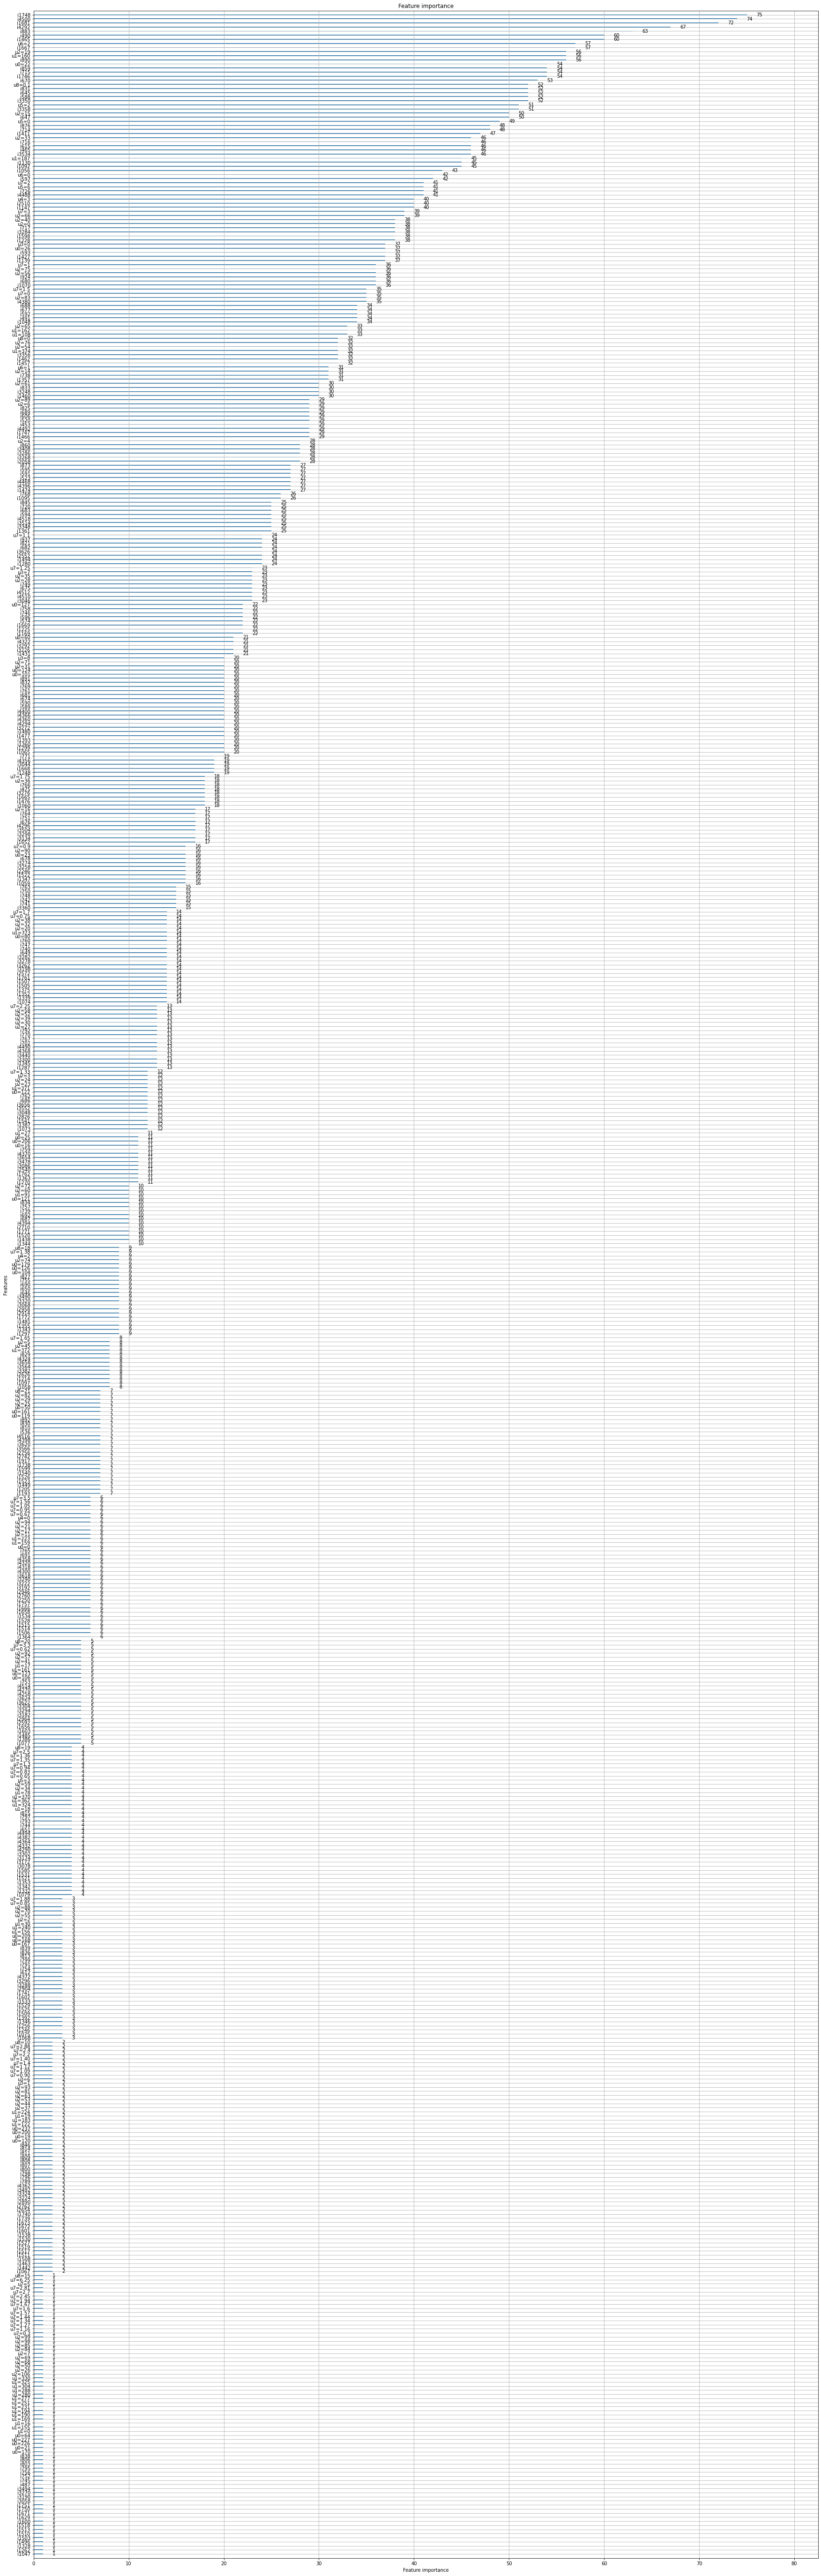

In [69]:
# lgb.plot_importance(clf, figsize=(30,100));

### Adding statistics of friends

In [10]:
friends_df = pd.read_csv('data/trainval_features_friends.csv')

In [11]:
friends_features_subm = pd.read_csv('data/subm_features_friends.csv')

In [33]:
agg_features_train_val_friends = friends_df.groupby('CLIENT_ID')[friends_df.columns.drop(['CLIENT_ID', 'FRIEND_ID'])].mean()
agg_features_test_friends = friends_features_subm.groupby('CLIENT_ID')[friends_features_subm.columns.drop(['CLIENT_ID'])].mean()

In [34]:
df_train_wfriends = df_train_self.loc[:, cat_useful_features.tolist()+['CLIENT_ID']].merge(agg_features_train_val_friends, how='inner', left_on='CLIENT_ID', right_index=True ,suffixes=['_l', '_r'])
left_train_client_id = df_train_wfriends.CLIENT_ID.values
df_train_wfriends = df_train_wfriends.drop(['CLIENT_ID'], axis=1)

In [35]:
df_val_wfriends = df_val_self.loc[:, cat_useful_features.tolist()+['CLIENT_ID']].merge(agg_features_train_val_friends, how='inner', left_on='CLIENT_ID', right_index=True ,suffixes=['_l', '_r'])
left_val_client_id = df_val_wfriends.CLIENT_ID.values
df_val_wfriends = df_val_wfriends.drop(['CLIENT_ID'], axis=1)

In [36]:
y_train_wf = target_df[target_df.CLIENT_ID.isin(left_train_client_id)].sort_values('CLIENT_ID').TARGET.values.astype(np.int32)
y_val_wf = target_df[target_df.CLIENT_ID.isin(left_val_client_id)].sort_values('CLIENT_ID').TARGET.values.astype(np.int32)

In [37]:
models = {
    'logreg' : LogisticRegression(n_jobs=-1, max_iter=10, verbose=1001),
    'lgb':LGBMClassifier(
    #     boosting_type='gbdt',
        n_estimators=1000,
    # #     num_leaves = 50,
        learning_rate = 0.03,
    #     max_depth = 100,
    #     num_leaves = 20,
    # #     subsample = 0.9,
    # #     class_weight= 'balanced',
        n_jobs=-1,
        silent=False,
        random_state=42,
    ),
   "xgb": XGBClassifier(
       tree_method='gpu_hist', 
       verbosity=1, 
       n_estimators = 1000,
       learning_rate = 0.01,
       max_depth = 10,
   ),
    "cat": CatBoostClassifier(
        iterations=3000,
        learning_rate=0.01,
        silent=False,
        random_seed=42,
        task_type='GPU',
        eval_metric = 'AUC',
#         subsample = 0.9,
#         boosting_type='Plain',
#         bootstrap_type = 'Bernoulli' ,
#         colsample_bylevel = 0.8,
#         auto_class_weights = 'Balanced' ,
#         max_ctr_complexity = 2,
        max_depth=10,
        
#         metric_period=50,
    )
}

In [ ]:
clf_wf = models['cat']
scores = {}
probas = {}

# cat_useful_features = ['i4500', 'i1748', 'i4292', 'i831', 'i1667', 'i715', 'u1=187',
#        'u2=76', 'u2=75', 'u2=19', 'i883', 'i4488', 'i1411', 'i890',
#        'u7=1.5', 'i588', 'i1457', 'i3534', 'u1=160', 'i1681', 'i1460',
#        'i1598', 'u2=15', 'u2=66', 'i1092', 'u2=54', 'i720', 'i3350',
#        'u0=22', 'i714', 'i1465', 'i859', 'i1746', 'u7=1', 'u0=124',
#        'u1=108', 'i768', 'i3358', 'i688', 'i1462', 'i1147', 'u8=0.1',
#        'u4=3', 'u0=26', 'i591', 'i3268', 'i876', 'i1466', 'u2=4', 'u7=2',
#        'u2=83', 'i717', 'i3284', 'i860', 'i1431', 'i1361', 'u2=14',
#        'i1130', 'u1=374', 'i465', 'i676', 'i490', 'u5=2', 'u2=6', 'i491',
#        'u6=2', 'i1070', 'i574', 'u0=127', 'i520', 'i4492', 'i647', 'i597',
#        'i453', 'i4294', 'u5=6', 'i825', 'i606', 'u0=23', 'u2=40', 'i1360',
#        'i845', 'u7=1.33', 'u2=31', 'i726', 'i670', 'i1669', 'i593',
#        'i2510', 'i821', 'u2=0', 'i1438', 'i4296', 'i650', 'u2=36',
#        'u2=38', 'u3=7', 'u7=2.25', 'u7=3', 'i2626']


clf_wf.fit(
    df_train_wfriends,
    y_train_wf,
#     eval_set=[(
#         df_val_wfriends, 
#         y_val_wf)],
#     eval_metric=['auc'],
#     early_stopping_rounds=300,
    plot=True,
)

probas['train'] = clf_wf.predict_proba(df_train_wfriends.iloc[:, :])[:, 1]
probas['val'] = clf_wf.predict_proba(df_val_wfriends.iloc[:, :])[:, 1]
scores['train'] = metric(y_train_wf, probas['train'])
scores['val'] = metric(y_val_wf, probas['val'])

print(scores)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 127ms	remaining: 6m 21s
1:	total: 235ms	remaining: 5m 51s
2:	total: 327ms	remaining: 5m 26s
3:	total: 419ms	remaining: 5m 13s
4:	total: 509ms	remaining: 5m 4s
5:	total: 600ms	remaining: 4m 59s
6:	total: 691ms	remaining: 4m 55s
7:	total: 783ms	remaining: 4m 52s
8:	total: 876ms	remaining: 4m 50s
9:	total: 967ms	remaining: 4m 49s
10:	total: 1.06s	remaining: 4m 47s
11:	total: 1.15s	remaining: 4m 45s
12:	total: 1.24s	remaining: 4m 44s
13:	total: 1.33s	remaining: 4m 43s
14:	total: 1.42s	remaining: 4m 42s
15:	total: 1.51s	remaining: 4m 41s
16:	total: 1.6s	remaining: 4m 40s
17:	total: 1.69s	remaining: 4m 40s
18:	total: 1.78s	remaining: 4m 38s
19:	total: 1.87s	remaining: 4m 38s
20:	total: 1.95s	remaining: 4m 37s
21:	total: 2.04s	remaining: 4m 36s
22:	total: 2.13s	remaining: 4m 36s
23:	total: 2.22s	remaining: 4m 35s
24:	total: 2.31s	remaining: 4m 35s
25:	total: 2.4s	remaining: 4m 34s
26:	total: 2.49s	remaining: 4m 33s
27:	total: 2.58s	remaining: 4m 33s
28:	total: 2.67s	remaining: 4m 33

234:	total: 21s	remaining: 4m 7s
235:	total: 21.1s	remaining: 4m 7s
236:	total: 21.2s	remaining: 4m 6s
237:	total: 21.3s	remaining: 4m 6s
238:	total: 21.4s	remaining: 4m 6s
239:	total: 21.4s	remaining: 4m 6s
240:	total: 21.5s	remaining: 4m 6s
241:	total: 21.6s	remaining: 4m 6s
242:	total: 21.7s	remaining: 4m 6s
243:	total: 21.8s	remaining: 4m 6s
244:	total: 21.9s	remaining: 4m 6s
245:	total: 22s	remaining: 4m 6s
246:	total: 22.1s	remaining: 4m 5s
247:	total: 22.2s	remaining: 4m 5s
248:	total: 22.2s	remaining: 4m 5s
249:	total: 22.3s	remaining: 4m 5s
250:	total: 22.4s	remaining: 4m 5s
251:	total: 22.5s	remaining: 4m 5s
252:	total: 22.6s	remaining: 4m 5s
253:	total: 22.7s	remaining: 4m 5s
254:	total: 22.8s	remaining: 4m 4s
255:	total: 22.9s	remaining: 4m 4s
256:	total: 22.9s	remaining: 4m 4s
257:	total: 23s	remaining: 4m 4s
258:	total: 23.1s	remaining: 4m 4s
259:	total: 23.2s	remaining: 4m 4s
260:	total: 23.3s	remaining: 4m 4s
261:	total: 23.4s	remaining: 4m 4s
262:	total: 23.5s	remainin

468:	total: 41.1s	remaining: 3m 41s
469:	total: 41.2s	remaining: 3m 41s
470:	total: 41.3s	remaining: 3m 41s
471:	total: 41.4s	remaining: 3m 41s
472:	total: 41.5s	remaining: 3m 41s
473:	total: 41.6s	remaining: 3m 41s
474:	total: 41.7s	remaining: 3m 41s
475:	total: 41.8s	remaining: 3m 41s
476:	total: 41.9s	remaining: 3m 41s
477:	total: 41.9s	remaining: 3m 41s
478:	total: 42s	remaining: 3m 41s
479:	total: 42.1s	remaining: 3m 41s
480:	total: 42.2s	remaining: 3m 40s
481:	total: 42.3s	remaining: 3m 40s
482:	total: 42.4s	remaining: 3m 40s
483:	total: 42.5s	remaining: 3m 40s
484:	total: 42.5s	remaining: 3m 40s
485:	total: 42.6s	remaining: 3m 40s
486:	total: 42.7s	remaining: 3m 40s
487:	total: 42.8s	remaining: 3m 40s
488:	total: 42.9s	remaining: 3m 40s
489:	total: 42.9s	remaining: 3m 39s
490:	total: 43s	remaining: 3m 39s
491:	total: 43.1s	remaining: 3m 39s
492:	total: 43.2s	remaining: 3m 39s
493:	total: 43.3s	remaining: 3m 39s
494:	total: 43.4s	remaining: 3m 39s
495:	total: 43.4s	remaining: 3m 

699:	total: 1m	remaining: 3m 19s
700:	total: 1m	remaining: 3m 18s
701:	total: 1m	remaining: 3m 18s
702:	total: 1m	remaining: 3m 18s
703:	total: 1m	remaining: 3m 18s
704:	total: 1m	remaining: 3m 18s
705:	total: 1m 1s	remaining: 3m 18s
706:	total: 1m 1s	remaining: 3m 18s
707:	total: 1m 1s	remaining: 3m 18s
708:	total: 1m 1s	remaining: 3m 18s
709:	total: 1m 1s	remaining: 3m 18s
710:	total: 1m 1s	remaining: 3m 17s
711:	total: 1m 1s	remaining: 3m 17s
712:	total: 1m 1s	remaining: 3m 17s
713:	total: 1m 1s	remaining: 3m 17s
714:	total: 1m 1s	remaining: 3m 17s
715:	total: 1m 1s	remaining: 3m 17s
716:	total: 1m 1s	remaining: 3m 17s
717:	total: 1m 2s	remaining: 3m 17s
718:	total: 1m 2s	remaining: 3m 17s
719:	total: 1m 2s	remaining: 3m 17s
720:	total: 1m 2s	remaining: 3m 16s
721:	total: 1m 2s	remaining: 3m 16s
722:	total: 1m 2s	remaining: 3m 16s
723:	total: 1m 2s	remaining: 3m 16s
724:	total: 1m 2s	remaining: 3m 16s
725:	total: 1m 2s	remaining: 3m 16s
726:	total: 1m 2s	remaining: 3m 16s
727:	total

930:	total: 1m 19s	remaining: 2m 57s
931:	total: 1m 19s	remaining: 2m 57s
932:	total: 1m 20s	remaining: 2m 57s
933:	total: 1m 20s	remaining: 2m 57s
934:	total: 1m 20s	remaining: 2m 57s
935:	total: 1m 20s	remaining: 2m 57s
936:	total: 1m 20s	remaining: 2m 57s
937:	total: 1m 20s	remaining: 2m 56s
938:	total: 1m 20s	remaining: 2m 56s
939:	total: 1m 20s	remaining: 2m 56s
940:	total: 1m 20s	remaining: 2m 56s
941:	total: 1m 20s	remaining: 2m 56s
942:	total: 1m 20s	remaining: 2m 56s
943:	total: 1m 20s	remaining: 2m 56s
944:	total: 1m 21s	remaining: 2m 56s
945:	total: 1m 21s	remaining: 2m 56s
946:	total: 1m 21s	remaining: 2m 56s
947:	total: 1m 21s	remaining: 2m 56s
948:	total: 1m 21s	remaining: 2m 55s
949:	total: 1m 21s	remaining: 2m 55s
950:	total: 1m 21s	remaining: 2m 55s
951:	total: 1m 21s	remaining: 2m 55s
952:	total: 1m 21s	remaining: 2m 55s
953:	total: 1m 21s	remaining: 2m 55s
954:	total: 1m 21s	remaining: 2m 55s
955:	total: 1m 22s	remaining: 2m 55s
956:	total: 1m 22s	remaining: 2m 55s
9

1149:	total: 1m 38s	remaining: 2m 37s
1150:	total: 1m 38s	remaining: 2m 37s
1151:	total: 1m 38s	remaining: 2m 37s
1152:	total: 1m 38s	remaining: 2m 37s
1153:	total: 1m 38s	remaining: 2m 37s
1154:	total: 1m 38s	remaining: 2m 37s
1155:	total: 1m 38s	remaining: 2m 37s
1156:	total: 1m 38s	remaining: 2m 37s
1157:	total: 1m 38s	remaining: 2m 37s
1158:	total: 1m 38s	remaining: 2m 36s
1159:	total: 1m 38s	remaining: 2m 36s
1160:	total: 1m 38s	remaining: 2m 36s
1161:	total: 1m 39s	remaining: 2m 36s
1162:	total: 1m 39s	remaining: 2m 36s
1163:	total: 1m 39s	remaining: 2m 36s
1164:	total: 1m 39s	remaining: 2m 36s
1165:	total: 1m 39s	remaining: 2m 36s
1166:	total: 1m 39s	remaining: 2m 36s
1167:	total: 1m 39s	remaining: 2m 36s
1168:	total: 1m 39s	remaining: 2m 36s
1169:	total: 1m 39s	remaining: 2m 35s
1170:	total: 1m 39s	remaining: 2m 35s
1171:	total: 1m 39s	remaining: 2m 35s
1172:	total: 1m 39s	remaining: 2m 35s
1173:	total: 1m 40s	remaining: 2m 35s
1174:	total: 1m 40s	remaining: 2m 35s
1175:	total:

1367:	total: 1m 56s	remaining: 2m 18s
1368:	total: 1m 56s	remaining: 2m 18s
1369:	total: 1m 56s	remaining: 2m 18s
1370:	total: 1m 56s	remaining: 2m 18s
1371:	total: 1m 56s	remaining: 2m 18s
1372:	total: 1m 56s	remaining: 2m 18s
1373:	total: 1m 56s	remaining: 2m 18s
1374:	total: 1m 56s	remaining: 2m 18s
1375:	total: 1m 56s	remaining: 2m 18s
1376:	total: 1m 57s	remaining: 2m 17s
1377:	total: 1m 57s	remaining: 2m 17s
1378:	total: 1m 57s	remaining: 2m 17s
1379:	total: 1m 57s	remaining: 2m 17s
1380:	total: 1m 57s	remaining: 2m 17s
1381:	total: 1m 57s	remaining: 2m 17s
1382:	total: 1m 57s	remaining: 2m 17s
1383:	total: 1m 57s	remaining: 2m 17s
1384:	total: 1m 57s	remaining: 2m 17s
1385:	total: 1m 57s	remaining: 2m 17s
1386:	total: 1m 57s	remaining: 2m 17s
1387:	total: 1m 57s	remaining: 2m 16s
1388:	total: 1m 58s	remaining: 2m 16s
1389:	total: 1m 58s	remaining: 2m 16s
1390:	total: 1m 58s	remaining: 2m 16s
1391:	total: 1m 58s	remaining: 2m 16s
1392:	total: 1m 58s	remaining: 2m 16s
1393:	total:

1592:	total: 2m 15s	remaining: 1m 59s
1593:	total: 2m 15s	remaining: 1m 59s
1594:	total: 2m 15s	remaining: 1m 59s
1595:	total: 2m 15s	remaining: 1m 59s
1596:	total: 2m 15s	remaining: 1m 59s
1597:	total: 2m 15s	remaining: 1m 58s
1598:	total: 2m 15s	remaining: 1m 58s
1599:	total: 2m 15s	remaining: 1m 58s
1600:	total: 2m 15s	remaining: 1m 58s
1601:	total: 2m 15s	remaining: 1m 58s
1602:	total: 2m 15s	remaining: 1m 58s
1603:	total: 2m 16s	remaining: 1m 58s
1604:	total: 2m 16s	remaining: 1m 58s
1605:	total: 2m 16s	remaining: 1m 58s
1606:	total: 2m 16s	remaining: 1m 58s
1607:	total: 2m 16s	remaining: 1m 58s
1608:	total: 2m 16s	remaining: 1m 57s
1609:	total: 2m 16s	remaining: 1m 57s
1610:	total: 2m 16s	remaining: 1m 57s
1611:	total: 2m 16s	remaining: 1m 57s
1612:	total: 2m 16s	remaining: 1m 57s
1613:	total: 2m 16s	remaining: 1m 57s
1614:	total: 2m 16s	remaining: 1m 57s
1615:	total: 2m 17s	remaining: 1m 57s
1616:	total: 2m 17s	remaining: 1m 57s
1617:	total: 2m 17s	remaining: 1m 57s
1618:	total:

1808:	total: 2m 33s	remaining: 1m 40s
1809:	total: 2m 33s	remaining: 1m 40s
1810:	total: 2m 33s	remaining: 1m 40s
1811:	total: 2m 33s	remaining: 1m 40s
1812:	total: 2m 33s	remaining: 1m 40s
1813:	total: 2m 33s	remaining: 1m 40s
1814:	total: 2m 33s	remaining: 1m 40s
1815:	total: 2m 33s	remaining: 1m 40s
1816:	total: 2m 33s	remaining: 1m 40s
1817:	total: 2m 33s	remaining: 1m 40s
1818:	total: 2m 34s	remaining: 1m 40s
1819:	total: 2m 34s	remaining: 1m 39s
1820:	total: 2m 34s	remaining: 1m 39s
1821:	total: 2m 34s	remaining: 1m 39s
1822:	total: 2m 34s	remaining: 1m 39s
1823:	total: 2m 34s	remaining: 1m 39s
1824:	total: 2m 34s	remaining: 1m 39s
1825:	total: 2m 34s	remaining: 1m 39s
1826:	total: 2m 34s	remaining: 1m 39s
1827:	total: 2m 34s	remaining: 1m 39s
1828:	total: 2m 34s	remaining: 1m 39s
1829:	total: 2m 34s	remaining: 1m 39s
1830:	total: 2m 35s	remaining: 1m 39s
1831:	total: 2m 35s	remaining: 1m 38s
1832:	total: 2m 35s	remaining: 1m 38s
1833:	total: 2m 35s	remaining: 1m 38s
1834:	total:

In [ ]:
print(clf_wf.get_params())
print(scores)

In [18]:
print(clf_wf.get_params())
print(scores)

{'iterations': 3000, 'learning_rate': 0.01, 'random_seed': 42, 'silent': False, 'eval_metric': 'AUC', 'boosting_type': 'Plain', 'task_type': 'GPU', 'bootstrap_type': 'Bernoulli', 'subsample': 0.9, 'max_depth': 10}
{'train': 0.9959409476412882, 'val': 0.6204387618807699}


In [25]:
print(clf_wf.get_params())
print(scores)

{'iterations': 3000, 'learning_rate': 0.01, 'random_seed': 42, 'silent': False, 'eval_metric': 'AUC', 'boosting_type': 'Plain', 'task_type': 'GPU', 'bootstrap_type': 'Bernoulli', 'max_depth': 10}
{'train': 0.9959409476412882, 'val': 0.6204387618807699}


In [22]:
print(clf_wf.get_params())
print(scores)

{'iterations': 3000, 'learning_rate': 0.01, 'random_seed': 42, 'silent': False, 'eval_metric': 'AUC', 'task_type': 'GPU', 'max_depth': 10}
{'train': 0.9943601055719973, 'val': 0.6215238415757405}


In [211]:
print(clf_wf.get_params())
print(scores)

{'iterations': 3000, 'learning_rate': 0.01, 'random_seed': 42, 'silent': False, 'eval_metric': 'AUC', 'task_type': 'GPU', 'max_depth': 10}
{'train': 0.9966600099794459, 'val': 0.6197325229945766}


### Selected features

In [110]:
X_train.loc[:, useful_features]

,i1048,i1056,i1070,i1092,i1095,i1130,i1139,i1147,i1228,i1357,...,u6=0,u6=1,u6=2,u7=0,u7=1,u7=1.5,u7=2,u7=3,u8=0,u8=0.1
0,0,3,3,1,0,0,0,0,0,46,...,896,0,1826,904,0,0,0,33,904,1894
1,16,156,2,0,0,20,0,1,17,64,...,2741,11181,3189,3328,11197,24,1611,17,3328,14550
2,5,13,0,44,5,19,0,24,22,349,...,0,0,0,0,0,0,0,0,0,1004
65481,20,10,0,0,0,47,0,0,0,0,...,1047,1084,171,1041,339,0,99,0,1078,331
65484,9,683,6,0,0,22,17,26,36,7,...,1819,42802,6949,4097,3150,48096,4466,0,4097,119931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159281,2,3,0,0,0,4,4,40,0,4,...,2334,8062,2413,2541,7326,2216,70,919,2557,10521
159283,0,52,12,4,0,666,0,54,8,523,...,12023,30419,1114,12349,7841,8,0,754,12349,83118
159284,0,27,0,22,6,5,0,0,1,1,...,0,0,4742,4316,0,363,57,6,4318,1291
159285,0,27,0,0,0,5,1,1,5,26,...,1479,8133,1015,1695,6868,0,796,0,1700,2990


In [112]:
# clf = LogisticRegression(n_jobs=-1, max_iter=10, verbose=1001)
clf_lessFeatures = LGBMClassifier(n_jobs=-1, n_estimators=1000, silent=False, )


scores = {}
probas = {}

clf_lessFeatures.fit(X_train.loc[:, useful_features], y_train)
probas['train'] = clf_lessFeatures.predict_proba(X_train.loc[:, useful_features])[:,1]
probas['val'] = clf_lessFeatures.predict_proba(X_val.loc[:, useful_features])[:,1]
scores['train'] = metric(y_train, probas['train'])
scores['val'] = metric(y_val, probas['val'])

print(scores)

C:\Users\pqlet\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 28009, number of negative: 73935
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.064652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30045
[LightGBM] [Info] Number of data points in the train set: 101944, number of used features: 119
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274749 -> initscore=-0.970660
[LightGBM] [Info] Start training from score -0.970660
{'train': 0.9588415862030919, 'val': 0.5974251923908137}


## Retro Date mean target plot

In [117]:
target_means_by_date = TARGETS_DATES_TRAINTEST[TARGETS_DATES_TRAINTEST.TARGET!='test'].astype(int).groupby(['RETRO_DT'])['TARGET'].mean()

In [121]:
target_means_by_date

RETRO_DT
20210501    0.309626
20210502    0.281250
20210503    0.294372
20210504    0.288430
20210505    0.278049
              ...   
20210727    0.263773
20210728    0.227132
20210729    0.250217
20210730    0.253545
20210731    0.270749
Name: TARGET, Length: 92, dtype: float64

In [128]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder()
x = oe.fit_transform(target_means_by_date.index.values).index.values

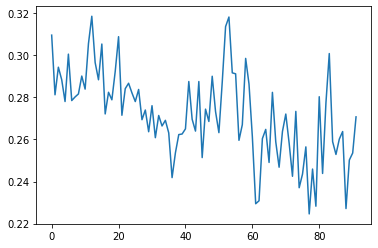

In [129]:
plt.plot(x, target_means_by_date)

In [43]:
TARGETS_DATES_TRAINTEST[TARGETS_DATES_TRAINTEST.TARGET!='test'].CLIENT_ID.values

array([1011725, 1018784, 1021812, ...,   72634,   72641,   72643],
      dtype=int64)

In [44]:
TARGETS_DATES_TRAINTEST.RETRO_DT.unique()

array([20210501, 20210502, 20210503, 20210504, 20210505, 20210506,
       20210507, 20210508, 20210509, 20210510, 20210511, 20210512,
       20210513, 20210514, 20210515, 20210516, 20210517, 20210518,
       20210519, 20210520, 20210521, 20210522, 20210523, 20210524,
       20210525, 20210526, 20210527, 20210528, 20210529, 20210530,
       20210531, 20210601, 20210602, 20210603, 20210604, 20210605,
       20210606, 20210607, 20210608, 20210609, 20210610, 20210611,
       20210612, 20210613, 20210614, 20210615, 20210616, 20210617,
       20210618, 20210619, 20210620, 20210621, 20210622, 20210623,
       20210624, 20210625, 20210626, 20210627, 20210628, 20210629,
       20210630, 20210701, 20210702, 20210703, 20210704, 20210705,
       20210706, 20210707, 20210708, 20210709, 20210710, 20210711,
       20210712, 20210713, 20210714, 20210715, 20210716, 20210717,
       20210718, 20210719, 20210720, 20210721, 20210722, 20210723,
       20210724, 20210725, 20210726, 20210727, 20210728, 20210

In [ ]:
TARGETS_DATES_TRAINTEST.

In [86]:
inner = SEQUENCES_TRAINTEST.merge(SEQUENCES_MATRIX, left_on='SEQUENCE', right_on='SESSIONS_SEQUENCES', how='inner')

In [89]:
SEQUENCES_TRAINTEST

,CLIENT_ID,SEQUENCE
0,1000100,"['e84b0f471b8e8f4aecc81eb27b16c092', '9a7670be..."
1,1000121,"['9804a8d70c5e8c26830bdafe2c2db49c', '9ca02fb0..."
2,1000131,"['b496d19eb25556bd64e481d11b6f7dd6', 'eb727f97..."
3,1000132,"['467a38fe36ef666e264823387f66f3c8', 'e0494409..."
4,100013,"['b496d19eb25556bd64e481d11b6f7dd6', 'fc18cab3..."
...,...,...
123702,999735,"['c734cde7f7ab57d48debbd587f4cf126', 'fdc759e2..."
123703,999783,"['1669b50f343dd2e888c2ef6e2a218b23', '27317357..."
123704,99978,"['5f82488fb41f39bb377b55eb85837dba', '6d69d039..."
123705,999791,"['6a59be6dae2918aa5a0d79ac0cbc39ef', 'dcfd13a9..."


In [88]:
inner.drop_duplicates()

,CLIENT_ID,SEQUENCE,SESSIONS_SEQUENCES
0,1000782,"['66a170274358721f938417a41ae445d9', 'ca431c64...","['66a170274358721f938417a41ae445d9', 'ca431c64..."
29,1478489,"['66a170274358721f938417a41ae445d9', 'ca431c64...","['66a170274358721f938417a41ae445d9', 'ca431c64..."
58,1507912,"['66a170274358721f938417a41ae445d9', 'ca431c64...","['66a170274358721f938417a41ae445d9', 'ca431c64..."
87,1525413,"['66a170274358721f938417a41ae445d9', 'ca431c64...","['66a170274358721f938417a41ae445d9', 'ca431c64..."
116,1540745,"['66a170274358721f938417a41ae445d9', 'ca431c64...","['66a170274358721f938417a41ae445d9', 'ca431c64..."
...,...,...,...
245892565,888176,['fa148f25838b3892d41f7d6269a1dc84'],['fa148f25838b3892d41f7d6269a1dc84']
245892566,900079,"['8cb2554df3851a780689a051d1fde6b6', '339e3a60...","['8cb2554df3851a780689a051d1fde6b6', '339e3a60..."
245892624,923246,"['b496d19eb25556bd64e481d11b6f7dd6', '6132eeb3...","['b496d19eb25556bd64e481d11b6f7dd6', '6132eeb3..."
245892629,929812,"['b496d19eb25556bd64e481d11b6f7dd6', '3372a6f1...","['b496d19eb25556bd64e481d11b6f7dd6', '3372a6f1..."


In [ ]:
TARGETS_DATES_TRAINTEST

# DASK

In [28]:
import dask.dataframe as dd 

friends_dd = dd.read_csv('data/FINAL_FEATURES_FRIENDS.tsv',sep='\t', )

In [29]:
friends_dd.dtypes

CLIENT_ID      int64
i1047        float64
i1048        float64
i1056        float64
i1058        float64
              ...   
u8=6         float64
u8=7         float64
u8=8         float64
u8=9         float64
FRIEND_ID      int64
Length: 1016, dtype: object

In [37]:
client_id_trainval = target_df[target_df.TARGET != 'test'].CLIENT_ID.values

In [67]:
client_id_subm = target_df[target_df.TARGET == 'test'].CLIENT_ID.values

In [68]:
client_id_subm

array([1025140, 1029732, 1079794, ...,   71657,   72631,   72642],
      dtype=int64)

In [84]:
df_train_self.shape, df_val_self.shape

(95572, 1015, 31858, 1015)

In [81]:
client_id_trainval.shape

(127430,)

In [39]:
friends_features_trainval = friends_dd.loc[friends_dd.CLIENT_ID.isin(client_id_trainval), cat_useful_features].compute()

In [128]:
friends_features_subm = friends_dd.loc[friends_dd.CLIENT_ID.isin(client_id_subm), cat_useful_features.tolist() + ['CLIENT_ID']].compute()

In [129]:
friends_features_subm

,i4500,i831,i715,i1411,i1748,i3534,u2=76,u1=187,i4292,i890,...,i3272,i770,u2=23,u5=2,i3566,u7=0.9,u1=372,u1=374,i678,CLIENT_ID
180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,14.0,0.0,112.0,0.0,722.0,0.0,24.0,0.0,999555
181,7.0,5.0,0.0,59.0,7.0,3.0,299.0,6560.0,1.0,0.0,...,4.0,5.0,0.0,1480.0,2.0,0.0,0.0,97.0,1.0,999555
182,0.0,1.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,3.0,...,0.0,7.0,0.0,699.0,0.0,0.0,0.0,0.0,0.0,999555
183,0.0,0.0,0.0,0.0,8.0,0.0,0.0,812.0,0.0,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,999555
184,61.0,0.0,0.0,0.0,60.0,0.0,193.0,85.0,1.0,1.0,...,0.0,0.0,0.0,31.0,0.0,0.0,0.0,30.0,1.0,999555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,2.0,110.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,904.0,6.0,751.0,0.0,0.0,0.0,1195945
15299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1195945
15300,0.0,11.0,0.0,7.0,0.0,109.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,25.0,10.0,0.0,0.0,0.0,0.0,1195945
15301,0.0,8.0,0.0,0.0,0.0,14.0,519.0,0.0,0.0,0.0,...,2.0,1.0,0.0,165.0,0.0,0.0,0.0,0.0,1.0,1195945


In [42]:
friends_features_trainval.to_csv('data/trainval_features_friends.csv')

In [45]:
friends_client_friendid_trainval = friends_dd.loc[friends_dd.CLIENT_ID.isin(client_id_trainval), ['CLIENT_ID','FRIEND_ID']].compute()

In [51]:
friends_df = pd.concat((friends_client_friendid_trainval, friends_features_trainval), axis=1)

In [53]:
friends_df.to_csv('data/trainval_features_friends.csv')

In [60]:
agg_features_train_val_friends = friends_df.groupby('CLIENT_ID')[friends_df.columns.drop(['CLIENT_ID', 'FRIEND_ID'])].mean()

In [130]:
friends_features_subm.to_csv('data/subm_features_friends.csv')

In [131]:
agg_features_test_friends = friends_features_subm.groupby('CLIENT_ID')[friends_features_subm.columns.drop(['CLIENT_ID'])].mean()

In [61]:
agg_features_train_val_friends

,i4500,i831,i715,i1411,i1748,i3534,u2=76,u1=187,i4292,i890,...,u8=18,i3272,i770,u2=23,u5=2,i3566,u7=0.9,u1=372,u1=374,i678
CLIENT_ID,,,,,,,,,,,,,,,,,,,,,
7150,11.400000,15.610000,16.890000,62.440000,7.830000,148.850000,174.700000,1004.930000,0.910000,9.690000,...,0.000000,1.050000,4.230000,0.060000,618.920000,12.200000,214.500000,229.470000,1022.490000,2.240000
7154,0.809524,12.428571,22.619048,13.619048,3.047619,42.476190,12.380952,15.047619,0.571429,9.285714,...,0.000000,1.428571,4.809524,0.000000,934.857143,1.857143,222.142857,5.714286,10.666667,23.904762
7156,0.000000,2.000000,0.000000,8.000000,0.000000,50.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,0.000000,108.000000,1.000000,0.000000,2.000000,2.000000,0.000000
8540,11.052632,19.315789,1.210526,52.578947,9.315789,109.684211,22.473684,1.157895,0.684211,19.947368,...,0.000000,0.105263,3.631579,0.000000,2406.315789,7.105263,521.842105,0.210526,155.526316,3.894737
26955,11.530000,41.390000,13.350000,166.970000,6.790000,229.210000,324.680000,1553.880000,1.280000,14.410000,...,0.000000,1.070000,6.710000,1.990000,2112.300000,11.560000,593.310000,378.480000,1027.890000,1.170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769995,28.930000,12.620000,6.710000,44.930000,13.590000,62.250000,608.070000,594.180000,2.220000,6.180000,...,0.010000,0.500000,7.610000,0.210000,1246.850000,0.590000,446.060000,42.870000,93.250000,2.890000
1770005,7.580000,22.170000,4.320000,53.020000,5.740000,94.370000,522.330000,814.700000,2.160000,18.230000,...,0.660000,1.340000,16.070000,0.000000,1123.670000,4.850000,16.050000,19.610000,1806.580000,3.290000
1770007,2.570000,18.400000,1.880000,38.100000,1.910000,77.110000,177.100000,664.680000,0.360000,7.220000,...,0.430000,0.470000,4.530000,0.020000,1075.500000,4.840000,45.080000,108.650000,623.730000,8.770000


In [75]:
import gc
gc.collect()

2285

# Models 

## Features only

# Submission 

## W/O Friends features

In [91]:
sample_subm_df = pd.read_csv(filepath_or_buffer="sample_submission.csv", sep=',')
subm_df = sample_subm_df.copy()

df_subm_self = sample_subm_df.drop('TARGET', axis=1).merge(FEATURES_TRAINTEST, on='CLIENT_ID')

In [92]:
sample_subm_df

,CLIENT_ID,TARGET
0,1504364,0.623702
1,1592092,0.754212
2,1582159,0.756855
3,1431753,0.880515
4,1571196,0.094763
...,...,...
31853,1518155,0.100278
31854,1544546,0.643005
31855,1584674,0.314064
31856,1733854,0.147863


In [93]:
df_subm_self

,CLIENT_ID,i1047,i1048,i1056,i1058,i1059,i1060,i1065,i1066,i1067,...,u8=17,u8=18,u8=19,u8=2,u8=20,u8=21,u8=6,u8=7,u8=8,u8=9
0,1504364,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1592092,0.0,4.0,1333.0,16.0,4.0,57.0,158.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1582159,0.0,5.0,9.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1431753,0.0,0.0,33.0,8.0,4.0,13.0,9.0,0.0,0.0,...,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1571196,0.0,3.0,3.0,0.0,10.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31853,1518155,0.0,26.0,9.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31854,1544546,0.0,0.0,7.0,3.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31855,1584674,0.0,4.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31856,1733854,0.0,2.0,10.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
client_id_subm = target_df[target_df.TARGET == 'test'].CLIENT_ID.values
X_subm = df_subm_self.drop('CLIENT_ID', axis=1).astype(np.int32)
X_subm = X_subm.drop(zero_std_features, axis=1)

# Selecting usefu features
X_subm = X_subm.loc[:, cat_useful_features.tolist()]

In [95]:
clf_subm = clf
preds_subm = clf_subm.predict_proba(X_subm)[:, 1]

In [96]:
subm_df.TARGET = preds_subm
subm_df

,CLIENT_ID,TARGET
0,1504364,0.255533
1,1592092,0.157720
2,1582159,0.311794
3,1431753,0.194075
4,1571196,0.260105
...,...,...
31853,1518155,0.143746
31854,1544546,0.159157
31855,1584674,0.255317
31856,1733854,0.169920


## Subm with friends

In [ ]:
subm_df_wo_friends = pd.read_csv(filepath_or_buffer="submissions/subm__24-09-2022_15-25-44.csv", sep=',')

df_subm_self = sample_subm_df.drop('TARGET', axis=1).merge(
    FEATURES_TRAINTEST.loc[:,cat_useful_features.tolist()+['CLIENT_ID']], 
    on='CLIENT_ID')

In [ ]:
df_subm_self = df_subm_self.merge(
    agg_features_test_friends, 
    left_on='CLIENT_ID', 
    right_index=True, 
    suffixes=['_l', '_r']
)
subm_client_id_with_friends = df_subm_self.CLIENT_ID
df_subm_self = df_subm_self.drop(['CLIENT_ID'], axis=1).astype(np.int32)

In [ ]:
clf_subm = clf_wf
preds_subm = clf_subm.predict_proba(df_subm_self)[:, 1]

In [ ]:
preds_df_wfriends = pd.DataFrame(subm_client_id_with_friends)
preds_df_wfriends['TARGET'] = preds_subm

In [ ]:
preds_df_wfriends_full = pd.concat(
    (subm_df_wo_friends[~subm_df_wo_friends.CLIENT_ID.isin(subm_client_id_with_friends)],
     preds_df_wfriends
    ), axis=0)

In [ ]:
subm_df = preds_df_wfriends_full.loc[sample_subm_df.index]

# Saving submission file

In [ ]:
from datetime import datetime

def get_curr_time():
    time_str = datetime.now().strftime('%d-%m-%Y_%H-%M-%S')
    return time_str

subm_df.to_csv(f"submissions/subm__{get_curr_time()}.csv",index=False)